In [13]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), 'modules'))

In [14]:
from token_predictor import TokenPredictor

tp = TokenPredictor()

In [15]:
x, y = tp._load_and_preprocess_data('GBTC', ['ETCG', 'ETHE', 'GDLC'])

print(x.shape)
print(y.shape)

(1121, 24)
(1121, 1)


In [16]:
x_train, x_test, y_train, y_test = tp._lstm_chunking(x, y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print()
print(tp.x_last.shape)

(971, 150, 24)
(971, 1)

(776, 150, 24)
(195, 150, 24)
(776, 1)
(195, 1)

(150, 24)


In [17]:
tp._create_lstm_model(x_train.shape)

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
tp.model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 150, 24)        │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 150, 24)        │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 150, 12)        │         1,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 6)              │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,647 (45.50 KB)

 Trainable params: 11,647 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
tp._create_lstm_model(x_train.shape)
tp._train_model(x_train, y_train, x_test, y_test)

2024-05-09 08:50:57.226321: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-05-09 08:50:57.226338: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-05-09 08:50:57.226343: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-05-09 08:50:57.226368: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-09 08:50:57.226383: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When 

Epoch 1/100


2024-05-09 08:50:57.894488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


7/7 - 3s - 373ms/step - loss: 0.9522 - val_loss: nan
Epoch 2/100
7/7 - 0s - 39ms/step - loss: 0.7680 - val_loss: nan
Epoch 3/100
7/7 - 0s - 37ms/step - loss: 0.6467 - val_loss: nan
Epoch 4/100
7/7 - 0s - 36ms/step - loss: 0.5558 - val_loss: nan
Epoch 5/100
7/7 - 0s - 36ms/step - loss: 0.4870 - val_loss: nan
Epoch 6/100
7/7 - 0s - 36ms/step - loss: 0.4313 - val_loss: nan
Epoch 7/100
7/7 - 0s - 36ms/step - loss: 0.3854 - val_loss: nan
Epoch 8/100
7/7 - 0s - 36ms/step - loss: 0.3387 - val_loss: nan
Epoch 9/100
7/7 - 0s - 36ms/step - loss: 0.2892 - val_loss: nan
Epoch 10/100
7/7 - 0s - 36ms/step - loss: 0.2544 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.2306 - val_loss: nan
Epoch 12/100
7/7 - 0s - 36ms/step - loss: 0.1997 - val_loss: nan
Epoch 13/100
7/7 - 0s - 36ms/step - loss: 0.1751 - val_loss: nan
Epoch 14/100
7/7 - 0s - 36ms/step - loss: 0.1555 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.1437 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.1

In [6]:
prediction = tp.predict()

prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


59.459885

In [7]:
import json

predicted_high = prediction
todays_open = json.load(open('./data/todays/GBTC.json'))['open']

probability_threshold = 60  # Probability threshold (e.g., 60%)

probability = tp.calculate_probability(predicted_high, todays_open)
if probability > probability_threshold:
    print("Enter trade")
else:
    print("Do not enter trade")

Enter trade


In [8]:
# Examine the tasks and do conformal .

In [9]:
x_train.shape[0]

776

In [10]:
# Saving 776 predictions

predictions = []

for i in range(x_train.shape[0]):
    predictions.append(tp.sim_predict(x_train[i]))

len(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

776

<Axes: >

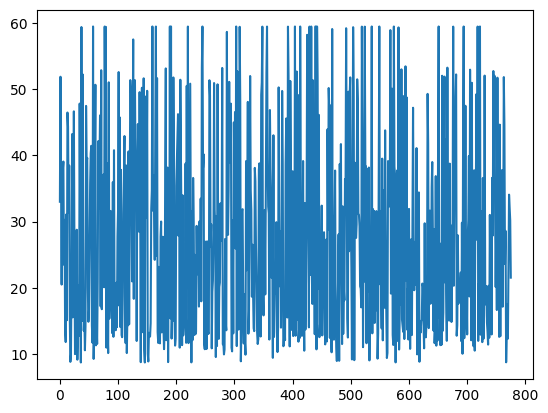

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(predictions)

In [12]:
todays_open = json.load(open('./data/todays/GBTC.json'))['open']

In [ ]:
probability_threshold = 60  # Probability threshold (e.g., 60%)

probability = tp.calculate_probability(predicted_high, todays_open)
if probability > probability_threshold:
    print("Enter trade")
else:
    print("Do not enter trade")

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Example function to generate synthetic data


def generate_synthetic_data(num_samples, num_features):
    # Generate random data: replace this with a more realistic data generating process
    x = np.random.normal(size=(num_samples, num_features))
    y = np.random.normal(loc=0.03, scale=0.01, size=(
        num_samples, 1))  # Simulated daily high prices
    return x, y

# Function to run Monte Carlo simulations


def monte_carlo_simulation(num_simulations, num_samples, num_features):
    results = []
    predictor = TokenPredictor()

    for _ in range(num_simulations):
        x, y = generate_synthetic_data(num_samples, num_features)

        # Assuming the data needs to be scaled and reshaped appropriately
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(x)
        y_scaled = scaler.fit_transform(y)

        # Train the model
        predictor.train()  # Ensure this method accepts x_scaled and y_scaled or modify accordingly

        # Prediction and probability calculation for the last sample
        prediction = predictor.predict()
        open_price = x[-1, 1]  # Assuming 'Open' price is the second feature
        probability = predictor.calculate_probability(prediction, open_price)

        results.append(probability)

    return results


# Example usage
num_simulations = 100
num_samples = 200
num_features = 10  # Adjust based on your data
simulation_results = monte_carlo_simulation(
    num_simulations, num_samples, num_features)

# Calculate statistics from results
mean_probability = np.mean(simulation_results)
print("Mean Probability:", mean_probability)

(971, 150, 24)
(971, 1)

Epoch 1/100


/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 359ms/step - loss: 0.9209 - val_loss: nan
Epoch 2/100
7/7 - 0s - 40ms/step - loss: 0.5632 - val_loss: nan
Epoch 3/100
7/7 - 0s - 37ms/step - loss: 0.3557 - val_loss: nan
Epoch 4/100
7/7 - 0s - 37ms/step - loss: 0.2772 - val_loss: nan
Epoch 5/100
7/7 - 0s - 38ms/step - loss: 0.2170 - val_loss: nan
Epoch 6/100
7/7 - 0s - 37ms/step - loss: 0.1430 - val_loss: nan
Epoch 7/100
7/7 - 0s - 36ms/step - loss: 0.0944 - val_loss: nan
Epoch 8/100
7/7 - 0s - 40ms/step - loss: 0.0805 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.0763 - val_loss: nan
Epoch 10/100
7/7 - 0s - 37ms/step - loss: 0.0623 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.0567 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0487 - val_loss: nan
Epoch 13/100
7/7 - 0s - 43ms/step - loss: 0.0434 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0397 - val_loss: nan
Epoch 15/100
7/7 - 0s - 40ms/step - loss: 0.0353 - val_loss: nan
Epoch 16/100
7/7 - 0s - 40ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 366ms/step - loss: 0.8470 - val_loss: nan
Epoch 2/100
7/7 - 0s - 40ms/step - loss: 0.4475 - val_loss: nan
Epoch 3/100
7/7 - 0s - 38ms/step - loss: 0.2985 - val_loss: nan
Epoch 4/100
7/7 - 0s - 39ms/step - loss: 0.2291 - val_loss: nan
Epoch 5/100
7/7 - 0s - 40ms/step - loss: 0.1828 - val_loss: nan
Epoch 6/100
7/7 - 0s - 37ms/step - loss: 0.1491 - val_loss: nan
Epoch 7/100
7/7 - 0s - 37ms/step - loss: 0.1281 - val_loss: nan
Epoch 8/100
7/7 - 0s - 37ms/step - loss: 0.1103 - val_loss: nan
Epoch 9/100
7/7 - 0s - 36ms/step - loss: 0.0941 - val_loss: nan
Epoch 10/100
7/7 - 0s - 37ms/step - loss: 0.0822 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.0731 - val_loss: nan
Epoch 12/100
7/7 - 0s - 37ms/step - loss: 0.0700 - val_loss: nan
Epoch 13/100
7/7 - 0s - 37ms/step - loss: 0.0702 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0646 - val_loss: nan
Epoch 15/100
7/7 - 0s - 36ms/step - loss: 0.0575 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 398ms/step - loss: 0.9280 - val_loss: nan
Epoch 2/100
7/7 - 0s - 45ms/step - loss: 0.6339 - val_loss: nan
Epoch 3/100
7/7 - 0s - 41ms/step - loss: 0.4758 - val_loss: nan
Epoch 4/100
7/7 - 0s - 41ms/step - loss: 0.3881 - val_loss: nan
Epoch 5/100
7/7 - 0s - 39ms/step - loss: 0.3340 - val_loss: nan
Epoch 6/100
7/7 - 0s - 43ms/step - loss: 0.2966 - val_loss: nan
Epoch 7/100
7/7 - 0s - 38ms/step - loss: 0.2496 - val_loss: nan
Epoch 8/100
7/7 - 0s - 38ms/step - loss: 0.1997 - val_loss: nan
Epoch 9/100
7/7 - 0s - 37ms/step - loss: 0.1642 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.1346 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.1151 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.0975 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0829 - val_loss: nan
Epoch 14/100
7/7 - 0s - 44ms/step - loss: 0.0741 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0642 - val_loss: nan
Epoch 16/100
7/7 - 0s - 40ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 504ms/step - loss: 0.7373 - val_loss: nan
Epoch 2/100
7/7 - 0s - 44ms/step - loss: 0.4347 - val_loss: nan
Epoch 3/100
7/7 - 0s - 43ms/step - loss: 0.2965 - val_loss: nan
Epoch 4/100
7/7 - 0s - 39ms/step - loss: 0.2431 - val_loss: nan
Epoch 5/100
7/7 - 0s - 39ms/step - loss: 0.1824 - val_loss: nan
Epoch 6/100
7/7 - 0s - 40ms/step - loss: 0.1227 - val_loss: nan
Epoch 7/100
7/7 - 0s - 39ms/step - loss: 0.0816 - val_loss: nan
Epoch 8/100
7/7 - 0s - 42ms/step - loss: 0.0710 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.0593 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.0513 - val_loss: nan
Epoch 11/100
7/7 - 0s - 45ms/step - loss: 0.0480 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0375 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0335 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0320 - val_loss: nan
Epoch 15/100
7/7 - 0s - 40ms/step - loss: 0.0314 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 415ms/step - loss: 0.9038 - val_loss: nan
Epoch 2/100
7/7 - 0s - 43ms/step - loss: 0.4635 - val_loss: nan
Epoch 3/100
7/7 - 0s - 44ms/step - loss: 0.3166 - val_loss: nan
Epoch 4/100
7/7 - 0s - 41ms/step - loss: 0.2819 - val_loss: nan
Epoch 5/100
7/7 - 0s - 37ms/step - loss: 0.2375 - val_loss: nan
Epoch 6/100
7/7 - 0s - 38ms/step - loss: 0.1859 - val_loss: nan
Epoch 7/100
7/7 - 0s - 41ms/step - loss: 0.1490 - val_loss: nan
Epoch 8/100
7/7 - 0s - 42ms/step - loss: 0.1267 - val_loss: nan
Epoch 9/100
7/7 - 0s - 37ms/step - loss: 0.1049 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.0879 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.0744 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0668 - val_loss: nan
Epoch 13/100
7/7 - 0s - 38ms/step - loss: 0.0585 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0511 - val_loss: nan
Epoch 15/100
7/7 - 0s - 42ms/step - loss: 0.0454 - val_loss: nan
Epoch 16/100
7/7 - 0s - 37ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 425ms/step - loss: 0.8923 - val_loss: nan
Epoch 2/100
7/7 - 0s - 49ms/step - loss: 0.5259 - val_loss: nan
Epoch 3/100
7/7 - 0s - 40ms/step - loss: 0.3305 - val_loss: nan
Epoch 4/100
7/7 - 0s - 43ms/step - loss: 0.2774 - val_loss: nan
Epoch 5/100
7/7 - 0s - 42ms/step - loss: 0.2381 - val_loss: nan
Epoch 6/100
7/7 - 0s - 39ms/step - loss: 0.1904 - val_loss: nan
Epoch 7/100
7/7 - 0s - 39ms/step - loss: 0.1417 - val_loss: nan
Epoch 8/100
7/7 - 0s - 38ms/step - loss: 0.1004 - val_loss: nan
Epoch 9/100
7/7 - 0s - 38ms/step - loss: 0.0784 - val_loss: nan
Epoch 10/100
7/7 - 0s - 42ms/step - loss: 0.0603 - val_loss: nan
Epoch 11/100
7/7 - 0s - 39ms/step - loss: 0.0484 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0430 - val_loss: nan
Epoch 13/100
7/7 - 0s - 37ms/step - loss: 0.0387 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0391 - val_loss: nan
Epoch 15/100
7/7 - 0s - 39ms/step - loss: 0.0346 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 5s - 645ms/step - loss: 0.8896 - val_loss: nan
Epoch 2/100
7/7 - 0s - 55ms/step - loss: 0.4608 - val_loss: nan
Epoch 3/100
7/7 - 0s - 50ms/step - loss: 0.3036 - val_loss: nan
Epoch 4/100
7/7 - 0s - 42ms/step - loss: 0.2323 - val_loss: nan
Epoch 5/100
7/7 - 0s - 43ms/step - loss: 0.1561 - val_loss: nan
Epoch 6/100
7/7 - 0s - 41ms/step - loss: 0.1174 - val_loss: nan
Epoch 7/100
7/7 - 0s - 42ms/step - loss: 0.1027 - val_loss: nan
Epoch 8/100
7/7 - 0s - 39ms/step - loss: 0.0856 - val_loss: nan
Epoch 9/100
7/7 - 0s - 38ms/step - loss: 0.0782 - val_loss: nan
Epoch 10/100
7/7 - 0s - 42ms/step - loss: 0.0720 - val_loss: nan
Epoch 11/100
7/7 - 0s - 43ms/step - loss: 0.0651 - val_loss: nan
Epoch 12/100
7/7 - 0s - 40ms/step - loss: 0.0590 - val_loss: nan
Epoch 13/100
7/7 - 0s - 40ms/step - loss: 0.0587 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0491 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0453 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 480ms/step - loss: 0.8350 - val_loss: nan
Epoch 2/100
7/7 - 0s - 50ms/step - loss: 0.6065 - val_loss: nan
Epoch 3/100
7/7 - 0s - 49ms/step - loss: 0.4990 - val_loss: nan
Epoch 4/100
7/7 - 0s - 41ms/step - loss: 0.4206 - val_loss: nan
Epoch 5/100
7/7 - 0s - 39ms/step - loss: 0.3575 - val_loss: nan
Epoch 6/100
7/7 - 0s - 39ms/step - loss: 0.2951 - val_loss: nan
Epoch 7/100
7/7 - 0s - 43ms/step - loss: 0.2326 - val_loss: nan
Epoch 8/100
7/7 - 0s - 42ms/step - loss: 0.1912 - val_loss: nan
Epoch 9/100
7/7 - 0s - 43ms/step - loss: 0.1601 - val_loss: nan
Epoch 10/100
7/7 - 0s - 53ms/step - loss: 0.1390 - val_loss: nan
Epoch 11/100
7/7 - 0s - 41ms/step - loss: 0.1271 - val_loss: nan
Epoch 12/100
7/7 - 0s - 40ms/step - loss: 0.1162 - val_loss: nan
Epoch 13/100
7/7 - 0s - 42ms/step - loss: 0.1042 - val_loss: nan
Epoch 14/100
7/7 - 0s - 40ms/step - loss: 0.0993 - val_loss: nan
Epoch 15/100
7/7 - 0s - 41ms/step - loss: 0.0890 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 501ms/step - loss: 0.6169 - val_loss: nan
Epoch 2/100
7/7 - 0s - 52ms/step - loss: 0.3571 - val_loss: nan
Epoch 3/100
7/7 - 0s - 43ms/step - loss: 0.2849 - val_loss: nan
Epoch 4/100
7/7 - 0s - 43ms/step - loss: 0.2452 - val_loss: nan
Epoch 5/100
7/7 - 0s - 38ms/step - loss: 0.1824 - val_loss: nan
Epoch 6/100
7/7 - 0s - 40ms/step - loss: 0.1534 - val_loss: nan
Epoch 7/100
7/7 - 0s - 38ms/step - loss: 0.1194 - val_loss: nan
Epoch 8/100
7/7 - 0s - 38ms/step - loss: 0.1035 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.0922 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.0820 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.0731 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0702 - val_loss: nan
Epoch 13/100
7/7 - 0s - 40ms/step - loss: 0.0673 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0575 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0530 - val_loss: nan
Epoch 16/100
7/7 - 0s - 36ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 525ms/step - loss: 0.8821 - val_loss: nan
Epoch 2/100
7/7 - 0s - 55ms/step - loss: 0.4565 - val_loss: nan
Epoch 3/100
7/7 - 0s - 45ms/step - loss: 0.3259 - val_loss: nan
Epoch 4/100
7/7 - 0s - 44ms/step - loss: 0.2925 - val_loss: nan
Epoch 5/100
7/7 - 0s - 41ms/step - loss: 0.2648 - val_loss: nan
Epoch 6/100
7/7 - 0s - 48ms/step - loss: 0.2156 - val_loss: nan
Epoch 7/100
7/7 - 0s - 40ms/step - loss: 0.1751 - val_loss: nan
Epoch 8/100
7/7 - 0s - 38ms/step - loss: 0.1236 - val_loss: nan
Epoch 9/100
7/7 - 0s - 38ms/step - loss: 0.1010 - val_loss: nan
Epoch 10/100
7/7 - 0s - 40ms/step - loss: 0.0846 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.0712 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0621 - val_loss: nan
Epoch 13/100
7/7 - 0s - 36ms/step - loss: 0.0572 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0538 - val_loss: nan
Epoch 15/100
7/7 - 0s - 36ms/step - loss: 0.0533 - val_loss: nan
Epoch 16/100
7/7 - 0s - 36ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 521ms/step - loss: 0.8020 - val_loss: nan
Epoch 2/100
7/7 - 0s - 53ms/step - loss: 0.3824 - val_loss: nan
Epoch 3/100
7/7 - 0s - 43ms/step - loss: 0.2660 - val_loss: nan
Epoch 4/100
7/7 - 0s - 47ms/step - loss: 0.1985 - val_loss: nan
Epoch 5/100
7/7 - 0s - 39ms/step - loss: 0.1443 - val_loss: nan
Epoch 6/100
7/7 - 0s - 37ms/step - loss: 0.1135 - val_loss: nan
Epoch 7/100
7/7 - 0s - 38ms/step - loss: 0.0971 - val_loss: nan
Epoch 8/100
7/7 - 0s - 38ms/step - loss: 0.0900 - val_loss: nan
Epoch 9/100
7/7 - 0s - 36ms/step - loss: 0.0789 - val_loss: nan
Epoch 10/100
7/7 - 0s - 37ms/step - loss: 0.0662 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.0566 - val_loss: nan
Epoch 12/100
7/7 - 0s - 37ms/step - loss: 0.0487 - val_loss: nan
Epoch 13/100
7/7 - 0s - 36ms/step - loss: 0.0458 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0420 - val_loss: nan
Epoch 15/100
7/7 - 0s - 36ms/step - loss: 0.0380 - val_loss: nan
Epoch 16/100
7/7 - 0s - 37ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 625ms/step - loss: 0.8974 - val_loss: nan
Epoch 2/100
7/7 - 0s - 56ms/step - loss: 0.5679 - val_loss: nan
Epoch 3/100
7/7 - 0s - 43ms/step - loss: 0.3416 - val_loss: nan
Epoch 4/100
7/7 - 0s - 44ms/step - loss: 0.2437 - val_loss: nan
Epoch 5/100
7/7 - 0s - 41ms/step - loss: 0.1903 - val_loss: nan
Epoch 6/100
7/7 - 0s - 43ms/step - loss: 0.1489 - val_loss: nan
Epoch 7/100
7/7 - 0s - 41ms/step - loss: 0.1195 - val_loss: nan
Epoch 8/100
7/7 - 0s - 38ms/step - loss: 0.0960 - val_loss: nan
Epoch 9/100
7/7 - 0s - 37ms/step - loss: 0.0764 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.0695 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.0587 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.0482 - val_loss: nan
Epoch 13/100
7/7 - 0s - 36ms/step - loss: 0.0411 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0359 - val_loss: nan
Epoch 15/100
7/7 - 0s - 39ms/step - loss: 0.0384 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 5s - 672ms/step - loss: 0.7628 - val_loss: nan
Epoch 2/100
7/7 - 0s - 56ms/step - loss: 0.4703 - val_loss: nan
Epoch 3/100
7/7 - 0s - 48ms/step - loss: 0.3697 - val_loss: nan
Epoch 4/100
7/7 - 0s - 45ms/step - loss: 0.2991 - val_loss: nan
Epoch 5/100
7/7 - 0s - 45ms/step - loss: 0.2295 - val_loss: nan
Epoch 6/100
7/7 - 0s - 42ms/step - loss: 0.1923 - val_loss: nan
Epoch 7/100
7/7 - 0s - 40ms/step - loss: 0.1442 - val_loss: nan
Epoch 8/100
7/7 - 0s - 40ms/step - loss: 0.1204 - val_loss: nan
Epoch 9/100
7/7 - 0s - 43ms/step - loss: 0.1042 - val_loss: nan
Epoch 10/100
7/7 - 0s - 40ms/step - loss: 0.0938 - val_loss: nan
Epoch 11/100
7/7 - 0s - 43ms/step - loss: 0.0849 - val_loss: nan
Epoch 12/100
7/7 - 0s - 41ms/step - loss: 0.0760 - val_loss: nan
Epoch 13/100
7/7 - 0s - 41ms/step - loss: 0.0670 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0602 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0540 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 489ms/step - loss: 0.7690 - val_loss: nan
Epoch 2/100
7/7 - 0s - 61ms/step - loss: 0.4668 - val_loss: nan
Epoch 3/100
7/7 - 0s - 45ms/step - loss: 0.3365 - val_loss: nan
Epoch 4/100
7/7 - 0s - 40ms/step - loss: 0.2764 - val_loss: nan
Epoch 5/100
7/7 - 0s - 41ms/step - loss: 0.2386 - val_loss: nan
Epoch 6/100
7/7 - 0s - 41ms/step - loss: 0.1983 - val_loss: nan
Epoch 7/100
7/7 - 0s - 41ms/step - loss: 0.1675 - val_loss: nan
Epoch 8/100
7/7 - 0s - 38ms/step - loss: 0.1267 - val_loss: nan
Epoch 9/100
7/7 - 0s - 39ms/step - loss: 0.1005 - val_loss: nan
Epoch 10/100
7/7 - 0s - 37ms/step - loss: 0.0790 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.0673 - val_loss: nan
Epoch 12/100
7/7 - 0s - 37ms/step - loss: 0.0573 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0532 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0474 - val_loss: nan
Epoch 15/100
7/7 - 0s - 40ms/step - loss: 0.0424 - val_loss: nan
Epoch 16/100
7/7 - 0s - 48ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 586ms/step - loss: 1.0045 - val_loss: nan
Epoch 2/100
7/7 - 0s - 62ms/step - loss: 0.7205 - val_loss: nan
Epoch 3/100
7/7 - 0s - 41ms/step - loss: 0.5398 - val_loss: nan
Epoch 4/100
7/7 - 0s - 47ms/step - loss: 0.3843 - val_loss: nan
Epoch 5/100
7/7 - 0s - 44ms/step - loss: 0.2949 - val_loss: nan
Epoch 6/100
7/7 - 0s - 39ms/step - loss: 0.2542 - val_loss: nan
Epoch 7/100
7/7 - 0s - 38ms/step - loss: 0.1977 - val_loss: nan
Epoch 8/100
7/7 - 0s - 39ms/step - loss: 0.1527 - val_loss: nan
Epoch 9/100
7/7 - 0s - 39ms/step - loss: 0.1178 - val_loss: nan
Epoch 10/100
7/7 - 0s - 40ms/step - loss: 0.0917 - val_loss: nan
Epoch 11/100
7/7 - 0s - 43ms/step - loss: 0.0803 - val_loss: nan
Epoch 12/100
7/7 - 0s - 40ms/step - loss: 0.0691 - val_loss: nan
Epoch 13/100
7/7 - 0s - 38ms/step - loss: 0.0580 - val_loss: nan
Epoch 14/100
7/7 - 0s - 39ms/step - loss: 0.0512 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0474 - val_loss: nan
Epoch 16/100
7/7 - 0s - 37ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 478ms/step - loss: 0.9642 - val_loss: nan
Epoch 2/100
7/7 - 0s - 61ms/step - loss: 0.7186 - val_loss: nan
Epoch 3/100
7/7 - 0s - 43ms/step - loss: 0.5408 - val_loss: nan
Epoch 4/100
7/7 - 0s - 56ms/step - loss: 0.4290 - val_loss: nan
Epoch 5/100
7/7 - 0s - 45ms/step - loss: 0.3551 - val_loss: nan
Epoch 6/100
7/7 - 0s - 43ms/step - loss: 0.3061 - val_loss: nan
Epoch 7/100
7/7 - 0s - 37ms/step - loss: 0.2737 - val_loss: nan
Epoch 8/100
7/7 - 0s - 41ms/step - loss: 0.2145 - val_loss: nan
Epoch 9/100
7/7 - 0s - 39ms/step - loss: 0.1776 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.1422 - val_loss: nan
Epoch 11/100
7/7 - 0s - 36ms/step - loss: 0.1193 - val_loss: nan
Epoch 12/100
7/7 - 0s - 37ms/step - loss: 0.1024 - val_loss: nan
Epoch 13/100
7/7 - 0s - 38ms/step - loss: 0.0895 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0811 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0726 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 5s - 741ms/step - loss: 0.8044 - val_loss: nan
Epoch 2/100
7/7 - 1s - 73ms/step - loss: 0.5273 - val_loss: nan
Epoch 3/100
7/7 - 0s - 61ms/step - loss: 0.3461 - val_loss: nan
Epoch 4/100
7/7 - 0s - 46ms/step - loss: 0.2590 - val_loss: nan
Epoch 5/100
7/7 - 0s - 39ms/step - loss: 0.2088 - val_loss: nan
Epoch 6/100
7/7 - 0s - 40ms/step - loss: 0.1573 - val_loss: nan
Epoch 7/100
7/7 - 0s - 49ms/step - loss: 0.1290 - val_loss: nan
Epoch 8/100
7/7 - 0s - 39ms/step - loss: 0.1009 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.0873 - val_loss: nan
Epoch 10/100
7/7 - 0s - 42ms/step - loss: 0.0786 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.0694 - val_loss: nan
Epoch 12/100
7/7 - 0s - 40ms/step - loss: 0.0632 - val_loss: nan
Epoch 13/100
7/7 - 0s - 41ms/step - loss: 0.0539 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0498 - val_loss: nan
Epoch 15/100
7/7 - 0s - 39ms/step - loss: 0.0474 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 549ms/step - loss: 0.8168 - val_loss: nan
Epoch 2/100
7/7 - 0s - 64ms/step - loss: 0.4570 - val_loss: nan
Epoch 3/100
7/7 - 0s - 51ms/step - loss: 0.3251 - val_loss: nan
Epoch 4/100
7/7 - 0s - 45ms/step - loss: 0.2665 - val_loss: nan
Epoch 5/100
7/7 - 0s - 38ms/step - loss: 0.1873 - val_loss: nan
Epoch 6/100
7/7 - 0s - 40ms/step - loss: 0.1382 - val_loss: nan
Epoch 7/100
7/7 - 0s - 39ms/step - loss: 0.1178 - val_loss: nan
Epoch 8/100
7/7 - 0s - 37ms/step - loss: 0.1061 - val_loss: nan
Epoch 9/100
7/7 - 0s - 37ms/step - loss: 0.0880 - val_loss: nan
Epoch 10/100
7/7 - 0s - 39ms/step - loss: 0.0743 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.0648 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.0576 - val_loss: nan
Epoch 13/100
7/7 - 0s - 37ms/step - loss: 0.0516 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0449 - val_loss: nan
Epoch 15/100
7/7 - 0s - 36ms/step - loss: 0.0453 - val_loss: nan
Epoch 16/100
7/7 - 0s - 36ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 540ms/step - loss: 0.8224 - val_loss: nan
Epoch 2/100
7/7 - 0s - 65ms/step - loss: 0.4496 - val_loss: nan
Epoch 3/100
7/7 - 0s - 53ms/step - loss: 0.3026 - val_loss: nan
Epoch 4/100
7/7 - 0s - 43ms/step - loss: 0.2650 - val_loss: nan
Epoch 5/100
7/7 - 0s - 44ms/step - loss: 0.2294 - val_loss: nan
Epoch 6/100
7/7 - 0s - 38ms/step - loss: 0.1869 - val_loss: nan
Epoch 7/100
7/7 - 0s - 40ms/step - loss: 0.1455 - val_loss: nan
Epoch 8/100
7/7 - 0s - 40ms/step - loss: 0.1007 - val_loss: nan
Epoch 9/100
7/7 - 0s - 39ms/step - loss: 0.0740 - val_loss: nan
Epoch 10/100
7/7 - 0s - 36ms/step - loss: 0.0670 - val_loss: nan
Epoch 11/100
7/7 - 0s - 36ms/step - loss: 0.0581 - val_loss: nan
Epoch 12/100
7/7 - 0s - 37ms/step - loss: 0.0518 - val_loss: nan
Epoch 13/100
7/7 - 0s - 38ms/step - loss: 0.0489 - val_loss: nan
Epoch 14/100
7/7 - 0s - 36ms/step - loss: 0.0441 - val_loss: nan
Epoch 15/100
7/7 - 0s - 36ms/step - loss: 0.0396 - val_loss: nan
Epoch 16/100
7/7 - 0s - 36ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 571ms/step - loss: 0.8833 - val_loss: nan
Epoch 2/100
7/7 - 0s - 62ms/step - loss: 0.6363 - val_loss: nan
Epoch 3/100
7/7 - 1s - 73ms/step - loss: 0.4849 - val_loss: nan
Epoch 4/100
7/7 - 0s - 40ms/step - loss: 0.3936 - val_loss: nan
Epoch 5/100
7/7 - 0s - 45ms/step - loss: 0.3222 - val_loss: nan
Epoch 6/100
7/7 - 0s - 39ms/step - loss: 0.2626 - val_loss: nan
Epoch 7/100
7/7 - 0s - 39ms/step - loss: 0.2105 - val_loss: nan
Epoch 8/100
7/7 - 0s - 38ms/step - loss: 0.1699 - val_loss: nan
Epoch 9/100
7/7 - 0s - 37ms/step - loss: 0.1362 - val_loss: nan
Epoch 10/100
7/7 - 0s - 39ms/step - loss: 0.1148 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.0977 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0864 - val_loss: nan
Epoch 13/100
7/7 - 0s - 38ms/step - loss: 0.0783 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0694 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0637 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 589ms/step - loss: 0.9820 - val_loss: nan
Epoch 2/100
7/7 - 0s - 63ms/step - loss: 0.4732 - val_loss: nan
Epoch 3/100
7/7 - 0s - 53ms/step - loss: 0.2890 - val_loss: nan
Epoch 4/100
7/7 - 0s - 53ms/step - loss: 0.1822 - val_loss: nan
Epoch 5/100
7/7 - 0s - 39ms/step - loss: 0.1404 - val_loss: nan
Epoch 6/100
7/7 - 0s - 39ms/step - loss: 0.1154 - val_loss: nan
Epoch 7/100
7/7 - 0s - 41ms/step - loss: 0.1017 - val_loss: nan
Epoch 8/100
7/7 - 0s - 39ms/step - loss: 0.0864 - val_loss: nan
Epoch 9/100
7/7 - 0s - 36ms/step - loss: 0.0757 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.0686 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.0639 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0584 - val_loss: nan
Epoch 13/100
7/7 - 0s - 37ms/step - loss: 0.0520 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0469 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0420 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 5s - 729ms/step - loss: 0.8873 - val_loss: nan
Epoch 2/100
7/7 - 1s - 80ms/step - loss: 0.5431 - val_loss: nan
Epoch 3/100
7/7 - 0s - 51ms/step - loss: 0.3210 - val_loss: nan
Epoch 4/100
7/7 - 0s - 47ms/step - loss: 0.2369 - val_loss: nan
Epoch 5/100
7/7 - 0s - 41ms/step - loss: 0.1682 - val_loss: nan
Epoch 6/100
7/7 - 0s - 43ms/step - loss: 0.1334 - val_loss: nan
Epoch 7/100
7/7 - 0s - 39ms/step - loss: 0.1084 - val_loss: nan
Epoch 8/100
7/7 - 0s - 39ms/step - loss: 0.0923 - val_loss: nan
Epoch 9/100
7/7 - 0s - 41ms/step - loss: 0.0754 - val_loss: nan
Epoch 10/100
7/7 - 0s - 39ms/step - loss: 0.0654 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.0588 - val_loss: nan
Epoch 12/100
7/7 - 0s - 37ms/step - loss: 0.0506 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0451 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0405 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0383 - val_loss: nan
Epoch 16/100
7/7 - 0s - 40ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 627ms/step - loss: 0.6243 - val_loss: nan
Epoch 2/100
7/7 - 1s - 77ms/step - loss: 0.3702 - val_loss: nan
Epoch 3/100
7/7 - 0s - 56ms/step - loss: 0.2658 - val_loss: nan
Epoch 4/100
7/7 - 0s - 49ms/step - loss: 0.1897 - val_loss: nan
Epoch 5/100
7/7 - 0s - 41ms/step - loss: 0.1413 - val_loss: nan
Epoch 6/100
7/7 - 0s - 40ms/step - loss: 0.1225 - val_loss: nan
Epoch 7/100
7/7 - 0s - 39ms/step - loss: 0.1098 - val_loss: nan
Epoch 8/100
7/7 - 0s - 40ms/step - loss: 0.0957 - val_loss: nan
Epoch 9/100
7/7 - 0s - 38ms/step - loss: 0.0868 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.0782 - val_loss: nan
Epoch 11/100
7/7 - 0s - 39ms/step - loss: 0.0742 - val_loss: nan
Epoch 12/100
7/7 - 0s - 37ms/step - loss: 0.0694 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0630 - val_loss: nan
Epoch 14/100
7/7 - 0s - 40ms/step - loss: 0.0584 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0533 - val_loss: nan
Epoch 16/100
7/7 - 0s - 37ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 616ms/step - loss: 0.8007 - val_loss: nan
Epoch 2/100
7/7 - 1s - 81ms/step - loss: 0.3336 - val_loss: nan
Epoch 3/100
7/7 - 0s - 65ms/step - loss: 0.2510 - val_loss: nan
Epoch 4/100
7/7 - 0s - 43ms/step - loss: 0.2122 - val_loss: nan
Epoch 5/100
7/7 - 0s - 41ms/step - loss: 0.1687 - val_loss: nan
Epoch 6/100
7/7 - 0s - 39ms/step - loss: 0.1433 - val_loss: nan
Epoch 7/100
7/7 - 0s - 44ms/step - loss: 0.1162 - val_loss: nan
Epoch 8/100
7/7 - 0s - 41ms/step - loss: 0.0983 - val_loss: nan
Epoch 9/100
7/7 - 0s - 38ms/step - loss: 0.0844 - val_loss: nan
Epoch 10/100
7/7 - 0s - 39ms/step - loss: 0.0722 - val_loss: nan
Epoch 11/100
7/7 - 0s - 40ms/step - loss: 0.0625 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0567 - val_loss: nan
Epoch 13/100
7/7 - 0s - 41ms/step - loss: 0.0501 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0441 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0417 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 628ms/step - loss: 0.8522 - val_loss: nan
Epoch 2/100
7/7 - 1s - 72ms/step - loss: 0.4501 - val_loss: nan
Epoch 3/100
7/7 - 0s - 63ms/step - loss: 0.3257 - val_loss: nan
Epoch 4/100
7/7 - 0s - 51ms/step - loss: 0.2699 - val_loss: nan
Epoch 5/100
7/7 - 0s - 41ms/step - loss: 0.2305 - val_loss: nan
Epoch 6/100
7/7 - 0s - 45ms/step - loss: 0.1899 - val_loss: nan
Epoch 7/100
7/7 - 0s - 40ms/step - loss: 0.1565 - val_loss: nan
Epoch 8/100
7/7 - 0s - 40ms/step - loss: 0.1237 - val_loss: nan
Epoch 9/100
7/7 - 0s - 39ms/step - loss: 0.1036 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.0887 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.0809 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.0731 - val_loss: nan
Epoch 13/100
7/7 - 0s - 48ms/step - loss: 0.0626 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0563 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0507 - val_loss: nan
Epoch 16/100
7/7 - 0s - 37ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 5s - 729ms/step - loss: 0.8225 - val_loss: nan
Epoch 2/100
7/7 - 1s - 74ms/step - loss: 0.4760 - val_loss: nan
Epoch 3/100
7/7 - 0s - 52ms/step - loss: 0.3382 - val_loss: nan
Epoch 4/100
7/7 - 0s - 42ms/step - loss: 0.2535 - val_loss: nan
Epoch 5/100
7/7 - 0s - 48ms/step - loss: 0.1817 - val_loss: nan
Epoch 6/100
7/7 - 0s - 48ms/step - loss: 0.1331 - val_loss: nan
Epoch 7/100
7/7 - 0s - 41ms/step - loss: 0.1090 - val_loss: nan
Epoch 8/100
7/7 - 0s - 40ms/step - loss: 0.0939 - val_loss: nan
Epoch 9/100
7/7 - 0s - 38ms/step - loss: 0.0745 - val_loss: nan
Epoch 10/100
7/7 - 0s - 42ms/step - loss: 0.0610 - val_loss: nan
Epoch 11/100
7/7 - 0s - 39ms/step - loss: 0.0522 - val_loss: nan
Epoch 12/100
7/7 - 0s - 37ms/step - loss: 0.0449 - val_loss: nan
Epoch 13/100
7/7 - 0s - 37ms/step - loss: 0.0422 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0398 - val_loss: nan
Epoch 15/100
7/7 - 0s - 40ms/step - loss: 0.0343 - val_loss: nan
Epoch 16/100
7/7 - 0s - 36ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 5s - 773ms/step - loss: 1.1309 - val_loss: nan
Epoch 2/100
7/7 - 1s - 72ms/step - loss: 0.8191 - val_loss: nan
Epoch 3/100
7/7 - 0s - 66ms/step - loss: 0.6250 - val_loss: nan
Epoch 4/100
7/7 - 0s - 56ms/step - loss: 0.4884 - val_loss: nan
Epoch 5/100
7/7 - 0s - 54ms/step - loss: 0.3983 - val_loss: nan
Epoch 6/100
7/7 - 0s - 51ms/step - loss: 0.3336 - val_loss: nan
Epoch 7/100
7/7 - 0s - 41ms/step - loss: 0.2869 - val_loss: nan
Epoch 8/100
7/7 - 0s - 38ms/step - loss: 0.2321 - val_loss: nan
Epoch 9/100
7/7 - 0s - 39ms/step - loss: 0.1781 - val_loss: nan
Epoch 10/100
7/7 - 0s - 40ms/step - loss: 0.1428 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.1212 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.1031 - val_loss: nan
Epoch 13/100
7/7 - 0s - 37ms/step - loss: 0.0886 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0767 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0685 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 5s - 743ms/step - loss: 1.1362 - val_loss: nan
Epoch 2/100
7/7 - 1s - 92ms/step - loss: 0.5133 - val_loss: nan
Epoch 3/100
7/7 - 0s - 46ms/step - loss: 0.3605 - val_loss: nan
Epoch 4/100
7/7 - 0s - 49ms/step - loss: 0.3102 - val_loss: nan
Epoch 5/100
7/7 - 0s - 40ms/step - loss: 0.2603 - val_loss: nan
Epoch 6/100
7/7 - 0s - 41ms/step - loss: 0.2155 - val_loss: nan
Epoch 7/100
7/7 - 0s - 44ms/step - loss: 0.1774 - val_loss: nan
Epoch 8/100
7/7 - 0s - 37ms/step - loss: 0.1418 - val_loss: nan
Epoch 9/100
7/7 - 0s - 38ms/step - loss: 0.1182 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.0968 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.0817 - val_loss: nan
Epoch 12/100
7/7 - 0s - 37ms/step - loss: 0.0722 - val_loss: nan
Epoch 13/100
7/7 - 0s - 37ms/step - loss: 0.0652 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0623 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0581 - val_loss: nan
Epoch 16/100
7/7 - 0s - 37ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 7s - 1s/step - loss: 0.8408 - val_loss: nan
Epoch 2/100
7/7 - 1s - 95ms/step - loss: 0.4275 - val_loss: nan
Epoch 3/100
7/7 - 0s - 48ms/step - loss: 0.2919 - val_loss: nan
Epoch 4/100
7/7 - 0s - 58ms/step - loss: 0.2392 - val_loss: nan
Epoch 5/100
7/7 - 0s - 45ms/step - loss: 0.1671 - val_loss: nan
Epoch 6/100
7/7 - 0s - 48ms/step - loss: 0.1206 - val_loss: nan
Epoch 7/100
7/7 - 0s - 43ms/step - loss: 0.1033 - val_loss: nan
Epoch 8/100
7/7 - 0s - 38ms/step - loss: 0.0908 - val_loss: nan
Epoch 9/100
7/7 - 0s - 41ms/step - loss: 0.0790 - val_loss: nan
Epoch 10/100
7/7 - 0s - 41ms/step - loss: 0.0713 - val_loss: nan
Epoch 11/100
7/7 - 0s - 41ms/step - loss: 0.0688 - val_loss: nan
Epoch 12/100
7/7 - 0s - 45ms/step - loss: 0.0595 - val_loss: nan
Epoch 13/100
7/7 - 0s - 41ms/step - loss: 0.0536 - val_loss: nan
Epoch 14/100
7/7 - 0s - 46ms/step - loss: 0.0481 - val_loss: nan
Epoch 15/100
7/7 - 0s - 49ms/step - loss: 0.0442 - val_loss: nan
Epoch 16/100
7/7 - 0s - 41ms/step - loss: 0.0407

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 6s - 818ms/step - loss: 0.8490 - val_loss: nan
Epoch 2/100
7/7 - 1s - 83ms/step - loss: 0.6693 - val_loss: nan
Epoch 3/100
7/7 - 0s - 63ms/step - loss: 0.5351 - val_loss: nan
Epoch 4/100
7/7 - 0s - 49ms/step - loss: 0.4435 - val_loss: nan
Epoch 5/100
7/7 - 0s - 51ms/step - loss: 0.3705 - val_loss: nan
Epoch 6/100
7/7 - 0s - 41ms/step - loss: 0.3043 - val_loss: nan
Epoch 7/100
7/7 - 0s - 51ms/step - loss: 0.2516 - val_loss: nan
Epoch 8/100
7/7 - 0s - 40ms/step - loss: 0.2168 - val_loss: nan
Epoch 9/100
7/7 - 0s - 38ms/step - loss: 0.1875 - val_loss: nan
Epoch 10/100
7/7 - 0s - 41ms/step - loss: 0.1634 - val_loss: nan
Epoch 11/100
7/7 - 0s - 42ms/step - loss: 0.1444 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.1298 - val_loss: nan
Epoch 13/100
7/7 - 0s - 40ms/step - loss: 0.1162 - val_loss: nan
Epoch 14/100
7/7 - 0s - 40ms/step - loss: 0.1039 - val_loss: nan
Epoch 15/100
7/7 - 0s - 39ms/step - loss: 0.0942 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 5s - 781ms/step - loss: 0.7887 - val_loss: nan
Epoch 2/100
7/7 - 1s - 77ms/step - loss: 0.3857 - val_loss: nan
Epoch 3/100
7/7 - 0s - 61ms/step - loss: 0.2574 - val_loss: nan
Epoch 4/100
7/7 - 0s - 54ms/step - loss: 0.2200 - val_loss: nan
Epoch 5/100
7/7 - 0s - 42ms/step - loss: 0.1639 - val_loss: nan
Epoch 6/100
7/7 - 0s - 43ms/step - loss: 0.1140 - val_loss: nan
Epoch 7/100
7/7 - 0s - 43ms/step - loss: 0.0843 - val_loss: nan
Epoch 8/100
7/7 - 0s - 42ms/step - loss: 0.0732 - val_loss: nan
Epoch 9/100
7/7 - 0s - 41ms/step - loss: 0.0620 - val_loss: nan
Epoch 10/100
7/7 - 0s - 41ms/step - loss: 0.0541 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.0462 - val_loss: nan
Epoch 12/100
7/7 - 0s - 40ms/step - loss: 0.0415 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0378 - val_loss: nan
Epoch 14/100
7/7 - 0s - 40ms/step - loss: 0.0382 - val_loss: nan
Epoch 15/100
7/7 - 0s - 41ms/step - loss: 0.0357 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 5s - 759ms/step - loss: 0.8101 - val_loss: nan
Epoch 2/100
7/7 - 1s - 79ms/step - loss: 0.5219 - val_loss: nan
Epoch 3/100
7/7 - 1s - 80ms/step - loss: 0.3624 - val_loss: nan
Epoch 4/100
7/7 - 0s - 47ms/step - loss: 0.2656 - val_loss: nan
Epoch 5/100
7/7 - 0s - 40ms/step - loss: 0.2021 - val_loss: nan
Epoch 6/100
7/7 - 0s - 51ms/step - loss: 0.1521 - val_loss: nan
Epoch 7/100
7/7 - 0s - 47ms/step - loss: 0.1156 - val_loss: nan
Epoch 8/100
7/7 - 0s - 39ms/step - loss: 0.0898 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.0765 - val_loss: nan
Epoch 10/100
7/7 - 0s - 40ms/step - loss: 0.0692 - val_loss: nan
Epoch 11/100
7/7 - 0s - 41ms/step - loss: 0.0624 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0574 - val_loss: nan
Epoch 13/100
7/7 - 0s - 38ms/step - loss: 0.0522 - val_loss: nan
Epoch 14/100
7/7 - 0s - 41ms/step - loss: 0.0484 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0433 - val_loss: nan
Epoch 16/100
7/7 - 0s - 40ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 5s - 771ms/step - loss: 0.8559 - val_loss: nan
Epoch 2/100
7/7 - 1s - 86ms/step - loss: 0.5909 - val_loss: nan
Epoch 3/100
7/7 - 0s - 60ms/step - loss: 0.4497 - val_loss: nan
Epoch 4/100
7/7 - 0s - 55ms/step - loss: 0.3532 - val_loss: nan
Epoch 5/100
7/7 - 0s - 41ms/step - loss: 0.2867 - val_loss: nan
Epoch 6/100
7/7 - 0s - 42ms/step - loss: 0.2400 - val_loss: nan
Epoch 7/100
7/7 - 0s - 37ms/step - loss: 0.1967 - val_loss: nan
Epoch 8/100
7/7 - 0s - 37ms/step - loss: 0.1522 - val_loss: nan
Epoch 9/100
7/7 - 0s - 38ms/step - loss: 0.1225 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.0985 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.0874 - val_loss: nan
Epoch 12/100
7/7 - 0s - 37ms/step - loss: 0.0759 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0694 - val_loss: nan
Epoch 14/100
7/7 - 0s - 40ms/step - loss: 0.0621 - val_loss: nan
Epoch 15/100
7/7 - 0s - 39ms/step - loss: 0.0579 - val_loss: nan
Epoch 16/100
7/7 - 0s - 37ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 6s - 809ms/step - loss: 0.7148 - val_loss: nan
Epoch 2/100
7/7 - 0s - 66ms/step - loss: 0.4285 - val_loss: nan
Epoch 3/100
7/7 - 0s - 65ms/step - loss: 0.3333 - val_loss: nan
Epoch 4/100
7/7 - 0s - 53ms/step - loss: 0.2841 - val_loss: nan
Epoch 5/100
7/7 - 0s - 44ms/step - loss: 0.2432 - val_loss: nan
Epoch 6/100
7/7 - 0s - 52ms/step - loss: 0.1973 - val_loss: nan
Epoch 7/100
7/7 - 0s - 39ms/step - loss: 0.1535 - val_loss: nan
Epoch 8/100
7/7 - 0s - 37ms/step - loss: 0.1233 - val_loss: nan
Epoch 9/100
7/7 - 0s - 42ms/step - loss: 0.1032 - val_loss: nan
Epoch 10/100
7/7 - 0s - 42ms/step - loss: 0.0896 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.0806 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0730 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0639 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0582 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0518 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 6s - 826ms/step - loss: 1.2253 - val_loss: nan
Epoch 2/100
7/7 - 1s - 88ms/step - loss: 0.6831 - val_loss: nan
Epoch 3/100
7/7 - 0s - 69ms/step - loss: 0.4858 - val_loss: nan
Epoch 4/100
7/7 - 0s - 41ms/step - loss: 0.3679 - val_loss: nan
Epoch 5/100
7/7 - 0s - 42ms/step - loss: 0.3124 - val_loss: nan
Epoch 6/100
7/7 - 0s - 43ms/step - loss: 0.2795 - val_loss: nan
Epoch 7/100
7/7 - 0s - 41ms/step - loss: 0.2502 - val_loss: nan
Epoch 8/100
7/7 - 0s - 43ms/step - loss: 0.2045 - val_loss: nan
Epoch 9/100
7/7 - 0s - 41ms/step - loss: 0.1587 - val_loss: nan
Epoch 10/100
7/7 - 0s - 39ms/step - loss: 0.1119 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.0861 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.0690 - val_loss: nan
Epoch 13/100
7/7 - 0s - 37ms/step - loss: 0.0605 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0529 - val_loss: nan
Epoch 15/100
7/7 - 0s - 39ms/step - loss: 0.0475 - val_loss: nan
Epoch 16/100
7/7 - 0s - 37ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 6s - 807ms/step - loss: 0.9651 - val_loss: nan
Epoch 2/100
7/7 - 1s - 80ms/step - loss: 0.5249 - val_loss: nan
Epoch 3/100
7/7 - 0s - 53ms/step - loss: 0.3098 - val_loss: nan
Epoch 4/100
7/7 - 0s - 64ms/step - loss: 0.2647 - val_loss: nan
Epoch 5/100
7/7 - 0s - 54ms/step - loss: 0.2017 - val_loss: nan
Epoch 6/100
7/7 - 0s - 49ms/step - loss: 0.1472 - val_loss: nan
Epoch 7/100
7/7 - 0s - 45ms/step - loss: 0.1103 - val_loss: nan
Epoch 8/100
7/7 - 0s - 45ms/step - loss: 0.0974 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.0819 - val_loss: nan
Epoch 10/100
7/7 - 0s - 49ms/step - loss: 0.0734 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.0645 - val_loss: nan
Epoch 12/100
7/7 - 0s - 41ms/step - loss: 0.0578 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0524 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0510 - val_loss: nan
Epoch 15/100
7/7 - 0s - 40ms/step - loss: 0.0514 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 5s - 772ms/step - loss: 0.8916 - val_loss: nan
Epoch 2/100
7/7 - 0s - 69ms/step - loss: 0.4708 - val_loss: nan
Epoch 3/100
7/7 - 0s - 54ms/step - loss: 0.3438 - val_loss: nan
Epoch 4/100
7/7 - 0s - 69ms/step - loss: 0.2650 - val_loss: nan
Epoch 5/100
7/7 - 0s - 51ms/step - loss: 0.2057 - val_loss: nan
Epoch 6/100
7/7 - 0s - 48ms/step - loss: 0.1642 - val_loss: nan
Epoch 7/100
7/7 - 0s - 43ms/step - loss: 0.1397 - val_loss: nan
Epoch 8/100
7/7 - 0s - 40ms/step - loss: 0.1163 - val_loss: nan
Epoch 9/100
7/7 - 0s - 42ms/step - loss: 0.1015 - val_loss: nan
Epoch 10/100
7/7 - 0s - 44ms/step - loss: 0.0839 - val_loss: nan
Epoch 11/100
7/7 - 0s - 42ms/step - loss: 0.0745 - val_loss: nan
Epoch 12/100
7/7 - 0s - 43ms/step - loss: 0.0637 - val_loss: nan
Epoch 13/100
7/7 - 0s - 42ms/step - loss: 0.0576 - val_loss: nan
Epoch 14/100
7/7 - 0s - 41ms/step - loss: 0.0512 - val_loss: nan
Epoch 15/100
7/7 - 0s - 43ms/step - loss: 0.0452 - val_loss: nan
Epoch 16/100
7/7 - 0s - 40ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 9s - 1s/step - loss: 0.7597 - val_loss: nan
Epoch 2/100
7/7 - 1s - 89ms/step - loss: 0.4947 - val_loss: nan
Epoch 3/100
7/7 - 0s - 52ms/step - loss: 0.3569 - val_loss: nan
Epoch 4/100
7/7 - 0s - 45ms/step - loss: 0.2661 - val_loss: nan
Epoch 5/100
7/7 - 0s - 53ms/step - loss: 0.1892 - val_loss: nan
Epoch 6/100
7/7 - 0s - 56ms/step - loss: 0.1407 - val_loss: nan
Epoch 7/100
7/7 - 0s - 41ms/step - loss: 0.1143 - val_loss: nan
Epoch 8/100
7/7 - 0s - 40ms/step - loss: 0.0967 - val_loss: nan
Epoch 9/100
7/7 - 0s - 39ms/step - loss: 0.0817 - val_loss: nan
Epoch 10/100
7/7 - 0s - 37ms/step - loss: 0.0725 - val_loss: nan
Epoch 11/100
7/7 - 0s - 40ms/step - loss: 0.0625 - val_loss: nan
Epoch 12/100
7/7 - 0s - 41ms/step - loss: 0.0571 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0476 - val_loss: nan
Epoch 14/100
7/7 - 0s - 40ms/step - loss: 0.0434 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0386 - val_loss: nan
Epoch 16/100
7/7 - 0s - 41ms/step - loss: 0.0409

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 5s - 758ms/step - loss: 0.7351 - val_loss: nan
Epoch 2/100
7/7 - 0s - 70ms/step - loss: 0.4479 - val_loss: nan
Epoch 3/100
7/7 - 0s - 46ms/step - loss: 0.3357 - val_loss: nan
Epoch 4/100
7/7 - 1s - 77ms/step - loss: 0.2636 - val_loss: nan
Epoch 5/100
7/7 - 0s - 48ms/step - loss: 0.2265 - val_loss: nan
Epoch 6/100
7/7 - 0s - 41ms/step - loss: 0.1829 - val_loss: nan
Epoch 7/100
7/7 - 0s - 39ms/step - loss: 0.1348 - val_loss: nan
Epoch 8/100
7/7 - 0s - 39ms/step - loss: 0.1080 - val_loss: nan
Epoch 9/100
7/7 - 0s - 42ms/step - loss: 0.0920 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.0818 - val_loss: nan
Epoch 11/100
7/7 - 0s - 42ms/step - loss: 0.0758 - val_loss: nan
Epoch 12/100
7/7 - 0s - 41ms/step - loss: 0.0696 - val_loss: nan
Epoch 13/100
7/7 - 0s - 38ms/step - loss: 0.0636 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0569 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0510 - val_loss: nan
Epoch 16/100
7/7 - 0s - 37ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 6s - 840ms/step - loss: 0.9351 - val_loss: nan
Epoch 2/100
7/7 - 1s - 82ms/step - loss: 0.5074 - val_loss: nan
Epoch 3/100
7/7 - 0s - 57ms/step - loss: 0.3409 - val_loss: nan
Epoch 4/100
7/7 - 0s - 59ms/step - loss: 0.2770 - val_loss: nan
Epoch 5/100
7/7 - 0s - 51ms/step - loss: 0.2357 - val_loss: nan
Epoch 6/100
7/7 - 0s - 58ms/step - loss: 0.1686 - val_loss: nan
Epoch 7/100
7/7 - 0s - 44ms/step - loss: 0.1323 - val_loss: nan
Epoch 8/100
7/7 - 0s - 48ms/step - loss: 0.1038 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.0870 - val_loss: nan
Epoch 10/100
7/7 - 0s - 43ms/step - loss: 0.0765 - val_loss: nan
Epoch 11/100
7/7 - 0s - 57ms/step - loss: 0.0655 - val_loss: nan
Epoch 12/100
7/7 - 0s - 45ms/step - loss: 0.0580 - val_loss: nan
Epoch 13/100
7/7 - 0s - 42ms/step - loss: 0.0508 - val_loss: nan
Epoch 14/100
7/7 - 0s - 39ms/step - loss: 0.0464 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0409 - val_loss: nan
Epoch 16/100
7/7 - 0s - 42ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 6s - 806ms/step - loss: 0.8107 - val_loss: nan
Epoch 2/100
7/7 - 1s - 88ms/step - loss: 0.4398 - val_loss: nan
Epoch 3/100
7/7 - 0s - 58ms/step - loss: 0.3145 - val_loss: nan
Epoch 4/100
7/7 - 0s - 48ms/step - loss: 0.2523 - val_loss: nan
Epoch 5/100
7/7 - 0s - 45ms/step - loss: 0.2031 - val_loss: nan
Epoch 6/100
7/7 - 0s - 50ms/step - loss: 0.1546 - val_loss: nan
Epoch 7/100
7/7 - 0s - 53ms/step - loss: 0.1281 - val_loss: nan
Epoch 8/100
7/7 - 0s - 42ms/step - loss: 0.1054 - val_loss: nan
Epoch 9/100
7/7 - 0s - 42ms/step - loss: 0.0873 - val_loss: nan
Epoch 10/100
7/7 - 0s - 44ms/step - loss: 0.0739 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.0635 - val_loss: nan
Epoch 12/100
7/7 - 0s - 41ms/step - loss: 0.0555 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0482 - val_loss: nan
Epoch 14/100
7/7 - 0s - 43ms/step - loss: 0.0426 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0387 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 6s - 794ms/step - loss: 0.9491 - val_loss: nan
Epoch 2/100
7/7 - 1s - 77ms/step - loss: 0.4947 - val_loss: nan
Epoch 3/100
7/7 - 1s - 80ms/step - loss: 0.3569 - val_loss: nan
Epoch 4/100
7/7 - 0s - 44ms/step - loss: 0.2675 - val_loss: nan
Epoch 5/100
7/7 - 0s - 54ms/step - loss: 0.1944 - val_loss: nan
Epoch 6/100
7/7 - 0s - 43ms/step - loss: 0.1536 - val_loss: nan
Epoch 7/100
7/7 - 0s - 45ms/step - loss: 0.1248 - val_loss: nan
Epoch 8/100
7/7 - 0s - 39ms/step - loss: 0.1038 - val_loss: nan
Epoch 9/100
7/7 - 0s - 41ms/step - loss: 0.0934 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.0832 - val_loss: nan
Epoch 11/100
7/7 - 0s - 41ms/step - loss: 0.0765 - val_loss: nan
Epoch 12/100
7/7 - 0s - 40ms/step - loss: 0.0712 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0633 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0609 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0591 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 7s - 1s/step - loss: 0.9780 - val_loss: nan
Epoch 2/100
7/7 - 1s - 87ms/step - loss: 0.7188 - val_loss: nan
Epoch 3/100
7/7 - 1s - 100ms/step - loss: 0.5252 - val_loss: nan
Epoch 4/100
7/7 - 0s - 46ms/step - loss: 0.3839 - val_loss: nan
Epoch 5/100
7/7 - 0s - 45ms/step - loss: 0.3049 - val_loss: nan
Epoch 6/100
7/7 - 0s - 50ms/step - loss: 0.2600 - val_loss: nan
Epoch 7/100
7/7 - 0s - 51ms/step - loss: 0.2018 - val_loss: nan
Epoch 8/100
7/7 - 0s - 40ms/step - loss: 0.1508 - val_loss: nan
Epoch 9/100
7/7 - 0s - 53ms/step - loss: 0.1180 - val_loss: nan
Epoch 10/100
7/7 - 0s - 42ms/step - loss: 0.0936 - val_loss: nan
Epoch 11/100
7/7 - 0s - 42ms/step - loss: 0.0807 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.0690 - val_loss: nan
Epoch 13/100
7/7 - 0s - 45ms/step - loss: 0.0616 - val_loss: nan
Epoch 14/100
7/7 - 0s - 42ms/step - loss: 0.0557 - val_loss: nan
Epoch 15/100
7/7 - 0s - 39ms/step - loss: 0.0516 - val_loss: nan
Epoch 16/100
7/7 - 0s - 43ms/step - loss: 0.047

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 6s - 866ms/step - loss: 0.6703 - val_loss: nan
Epoch 2/100
7/7 - 1s - 84ms/step - loss: 0.3855 - val_loss: nan
Epoch 3/100
7/7 - 0s - 71ms/step - loss: 0.2878 - val_loss: nan
Epoch 4/100
7/7 - 0s - 69ms/step - loss: 0.2078 - val_loss: nan
Epoch 5/100
7/7 - 0s - 47ms/step - loss: 0.1463 - val_loss: nan
Epoch 6/100
7/7 - 0s - 55ms/step - loss: 0.1013 - val_loss: nan
Epoch 7/100
7/7 - 0s - 47ms/step - loss: 0.0789 - val_loss: nan
Epoch 8/100
7/7 - 0s - 42ms/step - loss: 0.0647 - val_loss: nan
Epoch 9/100
7/7 - 0s - 46ms/step - loss: 0.0638 - val_loss: nan
Epoch 10/100
7/7 - 0s - 43ms/step - loss: 0.0518 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.0471 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0427 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0385 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0349 - val_loss: nan
Epoch 15/100
7/7 - 0s - 40ms/step - loss: 0.0337 - val_loss: nan
Epoch 16/100
7/7 - 0s - 43ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 7s - 1s/step - loss: 0.8931 - val_loss: nan
Epoch 2/100
7/7 - 1s - 102ms/step - loss: 0.4912 - val_loss: nan
Epoch 3/100
7/7 - 0s - 64ms/step - loss: 0.3510 - val_loss: nan
Epoch 4/100
7/7 - 1s - 74ms/step - loss: 0.2855 - val_loss: nan
Epoch 5/100
7/7 - 0s - 52ms/step - loss: 0.2393 - val_loss: nan
Epoch 6/100
7/7 - 0s - 51ms/step - loss: 0.1901 - val_loss: nan
Epoch 7/100
7/7 - 0s - 47ms/step - loss: 0.1564 - val_loss: nan
Epoch 8/100
7/7 - 0s - 41ms/step - loss: 0.1322 - val_loss: nan
Epoch 9/100
7/7 - 0s - 43ms/step - loss: 0.1114 - val_loss: nan
Epoch 10/100
7/7 - 0s - 49ms/step - loss: 0.0985 - val_loss: nan
Epoch 11/100
7/7 - 0s - 39ms/step - loss: 0.0922 - val_loss: nan
Epoch 12/100
7/7 - 0s - 40ms/step - loss: 0.0847 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0810 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0738 - val_loss: nan
Epoch 15/100
7/7 - 0s - 40ms/step - loss: 0.0721 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.066

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 8s - 1s/step - loss: 0.8131 - val_loss: nan
Epoch 2/100
7/7 - 1s - 139ms/step - loss: 0.4563 - val_loss: nan
Epoch 3/100
7/7 - 1s - 75ms/step - loss: 0.3449 - val_loss: nan
Epoch 4/100
7/7 - 0s - 46ms/step - loss: 0.3012 - val_loss: nan
Epoch 5/100
7/7 - 0s - 47ms/step - loss: 0.2713 - val_loss: nan
Epoch 6/100
7/7 - 0s - 61ms/step - loss: 0.2381 - val_loss: nan
Epoch 7/100
7/7 - 0s - 38ms/step - loss: 0.1924 - val_loss: nan
Epoch 8/100
7/7 - 0s - 37ms/step - loss: 0.1636 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.1359 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.1182 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.1046 - val_loss: nan
Epoch 12/100
7/7 - 0s - 43ms/step - loss: 0.0918 - val_loss: nan
Epoch 13/100
7/7 - 0s - 37ms/step - loss: 0.0876 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0784 - val_loss: nan
Epoch 15/100
7/7 - 0s - 36ms/step - loss: 0.0708 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.063

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 9s - 1s/step - loss: 0.8631 - val_loss: nan
Epoch 2/100
7/7 - 1s - 95ms/step - loss: 0.5214 - val_loss: nan
Epoch 3/100
7/7 - 1s - 73ms/step - loss: 0.3512 - val_loss: nan
Epoch 4/100
7/7 - 0s - 45ms/step - loss: 0.2818 - val_loss: nan
Epoch 5/100
7/7 - 0s - 44ms/step - loss: 0.2378 - val_loss: nan
Epoch 6/100
7/7 - 0s - 46ms/step - loss: 0.1764 - val_loss: nan
Epoch 7/100
7/7 - 0s - 44ms/step - loss: 0.1232 - val_loss: nan
Epoch 8/100
7/7 - 0s - 42ms/step - loss: 0.0878 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.0772 - val_loss: nan
Epoch 10/100
7/7 - 0s - 50ms/step - loss: 0.0675 - val_loss: nan
Epoch 11/100
7/7 - 0s - 40ms/step - loss: 0.0586 - val_loss: nan
Epoch 12/100
7/7 - 0s - 41ms/step - loss: 0.0511 - val_loss: nan
Epoch 13/100
7/7 - 0s - 42ms/step - loss: 0.0446 - val_loss: nan
Epoch 14/100
7/7 - 0s - 40ms/step - loss: 0.0409 - val_loss: nan
Epoch 15/100
7/7 - 0s - 39ms/step - loss: 0.0392 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.0375

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 6s - 840ms/step - loss: 0.8748 - val_loss: nan
Epoch 2/100
7/7 - 1s - 119ms/step - loss: 0.5065 - val_loss: nan
Epoch 3/100
7/7 - 0s - 60ms/step - loss: 0.3452 - val_loss: nan
Epoch 4/100
7/7 - 0s - 46ms/step - loss: 0.2780 - val_loss: nan
Epoch 5/100
7/7 - 0s - 41ms/step - loss: 0.2267 - val_loss: nan
Epoch 6/100
7/7 - 0s - 41ms/step - loss: 0.1643 - val_loss: nan
Epoch 7/100
7/7 - 0s - 55ms/step - loss: 0.1222 - val_loss: nan
Epoch 8/100
7/7 - 0s - 38ms/step - loss: 0.1043 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.0874 - val_loss: nan
Epoch 10/100
7/7 - 0s - 40ms/step - loss: 0.0753 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.0666 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.0574 - val_loss: nan
Epoch 13/100
7/7 - 0s - 42ms/step - loss: 0.0511 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0467 - val_loss: nan
Epoch 15/100
7/7 - 0s - 36ms/step - loss: 0.0448 - val_loss: nan
Epoch 16/100
7/7 - 0s - 41ms/step - loss: 0.

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 7s - 1s/step - loss: 0.8294 - val_loss: nan
Epoch 2/100
7/7 - 1s - 88ms/step - loss: 0.5042 - val_loss: nan
Epoch 3/100
7/7 - 0s - 56ms/step - loss: 0.4092 - val_loss: nan
Epoch 4/100
7/7 - 0s - 66ms/step - loss: 0.3532 - val_loss: nan
Epoch 5/100
7/7 - 0s - 43ms/step - loss: 0.3136 - val_loss: nan
Epoch 6/100
7/7 - 0s - 41ms/step - loss: 0.2803 - val_loss: nan
Epoch 7/100
7/7 - 0s - 39ms/step - loss: 0.2373 - val_loss: nan
Epoch 8/100
7/7 - 0s - 52ms/step - loss: 0.1863 - val_loss: nan
Epoch 9/100
7/7 - 0s - 38ms/step - loss: 0.1429 - val_loss: nan
Epoch 10/100
7/7 - 0s - 39ms/step - loss: 0.1227 - val_loss: nan
Epoch 11/100
7/7 - 0s - 39ms/step - loss: 0.1077 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.0953 - val_loss: nan
Epoch 13/100
7/7 - 0s - 40ms/step - loss: 0.0847 - val_loss: nan
Epoch 14/100
7/7 - 0s - 42ms/step - loss: 0.0747 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0645 - val_loss: nan
Epoch 16/100
7/7 - 0s - 37ms/step - loss: 0.0565

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 7s - 961ms/step - loss: 0.7458 - val_loss: nan
Epoch 2/100
7/7 - 1s - 113ms/step - loss: 0.3761 - val_loss: nan
Epoch 3/100
7/7 - 1s - 75ms/step - loss: 0.2392 - val_loss: nan
Epoch 4/100
7/7 - 0s - 54ms/step - loss: 0.1669 - val_loss: nan
Epoch 5/100
7/7 - 0s - 56ms/step - loss: 0.1195 - val_loss: nan
Epoch 6/100
7/7 - 0s - 41ms/step - loss: 0.0987 - val_loss: nan
Epoch 7/100
7/7 - 0s - 41ms/step - loss: 0.0861 - val_loss: nan
Epoch 8/100
7/7 - 0s - 45ms/step - loss: 0.0770 - val_loss: nan
Epoch 9/100
7/7 - 0s - 37ms/step - loss: 0.0718 - val_loss: nan
Epoch 10/100
7/7 - 0s - 37ms/step - loss: 0.0665 - val_loss: nan
Epoch 11/100
7/7 - 0s - 39ms/step - loss: 0.0624 - val_loss: nan
Epoch 12/100
7/7 - 0s - 40ms/step - loss: 0.0576 - val_loss: nan
Epoch 13/100
7/7 - 0s - 37ms/step - loss: 0.0519 - val_loss: nan
Epoch 14/100
7/7 - 0s - 43ms/step - loss: 0.0467 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0414 - val_loss: nan
Epoch 16/100
7/7 - 0s - 36ms/step - loss: 0.

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 7s - 974ms/step - loss: 0.9861 - val_loss: nan
Epoch 2/100
7/7 - 1s - 106ms/step - loss: 0.6645 - val_loss: nan
Epoch 3/100
7/7 - 0s - 51ms/step - loss: 0.4482 - val_loss: nan
Epoch 4/100
7/7 - 1s - 74ms/step - loss: 0.3347 - val_loss: nan
Epoch 5/100
7/7 - 0s - 62ms/step - loss: 0.2926 - val_loss: nan
Epoch 6/100
7/7 - 0s - 43ms/step - loss: 0.2583 - val_loss: nan
Epoch 7/100
7/7 - 0s - 38ms/step - loss: 0.2060 - val_loss: nan
Epoch 8/100
7/7 - 0s - 45ms/step - loss: 0.1657 - val_loss: nan
Epoch 9/100
7/7 - 0s - 39ms/step - loss: 0.1328 - val_loss: nan
Epoch 10/100
7/7 - 0s - 45ms/step - loss: 0.1097 - val_loss: nan
Epoch 11/100
7/7 - 0s - 39ms/step - loss: 0.0986 - val_loss: nan
Epoch 12/100
7/7 - 0s - 41ms/step - loss: 0.0916 - val_loss: nan
Epoch 13/100
7/7 - 0s - 36ms/step - loss: 0.0860 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0800 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0707 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 7s - 967ms/step - loss: 0.6897 - val_loss: nan
Epoch 2/100
7/7 - 1s - 114ms/step - loss: 0.3388 - val_loss: nan
Epoch 3/100
7/7 - 1s - 77ms/step - loss: 0.2880 - val_loss: nan
Epoch 4/100
7/7 - 0s - 63ms/step - loss: 0.2683 - val_loss: nan
Epoch 5/100
7/7 - 0s - 60ms/step - loss: 0.2342 - val_loss: nan
Epoch 6/100
7/7 - 0s - 38ms/step - loss: 0.1803 - val_loss: nan
Epoch 7/100
7/7 - 0s - 41ms/step - loss: 0.1463 - val_loss: nan
Epoch 8/100
7/7 - 0s - 39ms/step - loss: 0.1096 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.0852 - val_loss: nan
Epoch 10/100
7/7 - 0s - 41ms/step - loss: 0.0771 - val_loss: nan
Epoch 11/100
7/7 - 0s - 39ms/step - loss: 0.0691 - val_loss: nan
Epoch 12/100
7/7 - 0s - 37ms/step - loss: 0.0599 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0586 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0513 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0492 - val_loss: nan
Epoch 16/100
7/7 - 0s - 37ms/step - loss: 0.

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 7s - 1s/step - loss: 0.8494 - val_loss: nan
Epoch 2/100
7/7 - 1s - 113ms/step - loss: 0.6038 - val_loss: nan
Epoch 3/100
7/7 - 1s - 85ms/step - loss: 0.4847 - val_loss: nan
Epoch 4/100
7/7 - 0s - 64ms/step - loss: 0.4020 - val_loss: nan
Epoch 5/100
7/7 - 0s - 42ms/step - loss: 0.3348 - val_loss: nan
Epoch 6/100
7/7 - 0s - 45ms/step - loss: 0.2791 - val_loss: nan
Epoch 7/100
7/7 - 0s - 39ms/step - loss: 0.2374 - val_loss: nan
Epoch 8/100
7/7 - 0s - 41ms/step - loss: 0.2016 - val_loss: nan
Epoch 9/100
7/7 - 0s - 41ms/step - loss: 0.1701 - val_loss: nan
Epoch 10/100
7/7 - 0s - 39ms/step - loss: 0.1407 - val_loss: nan
Epoch 11/100
7/7 - 0s - 36ms/step - loss: 0.1231 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.1089 - val_loss: nan
Epoch 13/100
7/7 - 0s - 41ms/step - loss: 0.0967 - val_loss: nan
Epoch 14/100
7/7 - 0s - 41ms/step - loss: 0.0879 - val_loss: nan
Epoch 15/100
7/7 - 0s - 41ms/step - loss: 0.0787 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.073

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 8s - 1s/step - loss: 0.6756 - val_loss: nan
Epoch 2/100
7/7 - 1s - 129ms/step - loss: 0.4278 - val_loss: nan
Epoch 3/100
7/7 - 1s - 113ms/step - loss: 0.3325 - val_loss: nan
Epoch 4/100
7/7 - 0s - 50ms/step - loss: 0.2880 - val_loss: nan
Epoch 5/100
7/7 - 0s - 44ms/step - loss: 0.2493 - val_loss: nan
Epoch 6/100
7/7 - 0s - 39ms/step - loss: 0.2006 - val_loss: nan
Epoch 7/100
7/7 - 0s - 38ms/step - loss: 0.1725 - val_loss: nan
Epoch 8/100
7/7 - 0s - 38ms/step - loss: 0.1420 - val_loss: nan
Epoch 9/100
7/7 - 0s - 42ms/step - loss: 0.1133 - val_loss: nan
Epoch 10/100
7/7 - 0s - 40ms/step - loss: 0.0939 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.0809 - val_loss: nan
Epoch 12/100
7/7 - 0s - 37ms/step - loss: 0.0680 - val_loss: nan
Epoch 13/100
7/7 - 0s - 37ms/step - loss: 0.0583 - val_loss: nan
Epoch 14/100
7/7 - 0s - 39ms/step - loss: 0.0522 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0481 - val_loss: nan
Epoch 16/100
7/7 - 0s - 37ms/step - loss: 0.04

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 8s - 1s/step - loss: 0.8109 - val_loss: nan
Epoch 2/100
7/7 - 1s - 127ms/step - loss: 0.4284 - val_loss: nan
Epoch 3/100
7/7 - 0s - 54ms/step - loss: 0.3063 - val_loss: nan
Epoch 4/100
7/7 - 1s - 75ms/step - loss: 0.2615 - val_loss: nan
Epoch 5/100
7/7 - 0s - 50ms/step - loss: 0.2181 - val_loss: nan
Epoch 6/100
7/7 - 0s - 44ms/step - loss: 0.1586 - val_loss: nan
Epoch 7/100
7/7 - 0s - 48ms/step - loss: 0.1279 - val_loss: nan
Epoch 8/100
7/7 - 0s - 46ms/step - loss: 0.1053 - val_loss: nan
Epoch 9/100
7/7 - 0s - 38ms/step - loss: 0.0934 - val_loss: nan
Epoch 10/100
7/7 - 0s - 39ms/step - loss: 0.0798 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.0718 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0647 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0568 - val_loss: nan
Epoch 14/100
7/7 - 0s - 41ms/step - loss: 0.0507 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0457 - val_loss: nan
Epoch 16/100
7/7 - 0s - 36ms/step - loss: 0.040

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 7s - 930ms/step - loss: 0.7882 - val_loss: nan
Epoch 2/100
7/7 - 1s - 125ms/step - loss: 0.4921 - val_loss: nan
Epoch 3/100
7/7 - 1s - 75ms/step - loss: 0.3233 - val_loss: nan
Epoch 4/100
7/7 - 0s - 52ms/step - loss: 0.2293 - val_loss: nan
Epoch 5/100
7/7 - 0s - 43ms/step - loss: 0.1694 - val_loss: nan
Epoch 6/100
7/7 - 0s - 70ms/step - loss: 0.1402 - val_loss: nan
Epoch 7/100
7/7 - 0s - 38ms/step - loss: 0.1255 - val_loss: nan
Epoch 8/100
7/7 - 0s - 42ms/step - loss: 0.1059 - val_loss: nan
Epoch 9/100
7/7 - 0s - 41ms/step - loss: 0.0912 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.0768 - val_loss: nan
Epoch 11/100
7/7 - 0s - 41ms/step - loss: 0.0628 - val_loss: nan
Epoch 12/100
7/7 - 0s - 41ms/step - loss: 0.0547 - val_loss: nan
Epoch 13/100
7/7 - 0s - 38ms/step - loss: 0.0488 - val_loss: nan
Epoch 14/100
7/7 - 0s - 39ms/step - loss: 0.0450 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0411 - val_loss: nan
Epoch 16/100
7/7 - 0s - 37ms/step - loss: 0.

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 7s - 948ms/step - loss: 1.0815 - val_loss: nan
Epoch 2/100
7/7 - 1s - 127ms/step - loss: 0.7968 - val_loss: nan
Epoch 3/100
7/7 - 0s - 62ms/step - loss: 0.6410 - val_loss: nan
Epoch 4/100
7/7 - 0s - 62ms/step - loss: 0.5069 - val_loss: nan
Epoch 5/100
7/7 - 0s - 64ms/step - loss: 0.4128 - val_loss: nan
Epoch 6/100
7/7 - 0s - 65ms/step - loss: 0.3485 - val_loss: nan
Epoch 7/100
7/7 - 0s - 46ms/step - loss: 0.3104 - val_loss: nan
Epoch 8/100
7/7 - 0s - 38ms/step - loss: 0.2786 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.2306 - val_loss: nan
Epoch 10/100
7/7 - 0s - 39ms/step - loss: 0.1993 - val_loss: nan
Epoch 11/100
7/7 - 0s - 41ms/step - loss: 0.1725 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.1518 - val_loss: nan
Epoch 13/100
7/7 - 0s - 37ms/step - loss: 0.1277 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.1101 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0963 - val_loss: nan
Epoch 16/100
7/7 - 0s - 37ms/step - loss: 0.

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 7s - 1s/step - loss: 0.8227 - val_loss: nan
Epoch 2/100
7/7 - 1s - 129ms/step - loss: 0.5093 - val_loss: nan
Epoch 3/100
7/7 - 0s - 58ms/step - loss: 0.3473 - val_loss: nan
Epoch 4/100
7/7 - 1s - 93ms/step - loss: 0.2816 - val_loss: nan
Epoch 5/100
7/7 - 1s - 74ms/step - loss: 0.2348 - val_loss: nan
Epoch 6/100
7/7 - 0s - 39ms/step - loss: 0.1950 - val_loss: nan
Epoch 7/100
7/7 - 0s - 45ms/step - loss: 0.1681 - val_loss: nan
Epoch 8/100
7/7 - 0s - 39ms/step - loss: 0.1477 - val_loss: nan
Epoch 9/100
7/7 - 0s - 37ms/step - loss: 0.1288 - val_loss: nan
Epoch 10/100
7/7 - 0s - 37ms/step - loss: 0.1122 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.0997 - val_loss: nan
Epoch 12/100
7/7 - 0s - 42ms/step - loss: 0.0895 - val_loss: nan
Epoch 13/100
7/7 - 0s - 38ms/step - loss: 0.0836 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0741 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0674 - val_loss: nan
Epoch 16/100
7/7 - 0s - 42ms/step - loss: 0.062

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 8s - 1s/step - loss: 0.8662 - val_loss: nan
Epoch 2/100
7/7 - 1s - 106ms/step - loss: 0.4617 - val_loss: nan
Epoch 3/100
7/7 - 1s - 100ms/step - loss: 0.3308 - val_loss: nan
Epoch 4/100
7/7 - 0s - 52ms/step - loss: 0.2937 - val_loss: nan
Epoch 5/100
7/7 - 0s - 49ms/step - loss: 0.2584 - val_loss: nan
Epoch 6/100
7/7 - 0s - 48ms/step - loss: 0.2153 - val_loss: nan
Epoch 7/100
7/7 - 0s - 44ms/step - loss: 0.1772 - val_loss: nan
Epoch 8/100
7/7 - 0s - 41ms/step - loss: 0.1495 - val_loss: nan
Epoch 9/100
7/7 - 0s - 55ms/step - loss: 0.1173 - val_loss: nan
Epoch 10/100
7/7 - 0s - 50ms/step - loss: 0.0979 - val_loss: nan
Epoch 11/100
7/7 - 0s - 39ms/step - loss: 0.0876 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0801 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0707 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0653 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0616 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.05

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 7s - 956ms/step - loss: 0.8171 - val_loss: nan
Epoch 2/100
7/7 - 1s - 115ms/step - loss: 0.4374 - val_loss: nan
Epoch 3/100
7/7 - 0s - 70ms/step - loss: 0.3030 - val_loss: nan
Epoch 4/100
7/7 - 0s - 47ms/step - loss: 0.2409 - val_loss: nan
Epoch 5/100
7/7 - 0s - 58ms/step - loss: 0.1840 - val_loss: nan
Epoch 6/100
7/7 - 0s - 55ms/step - loss: 0.1490 - val_loss: nan
Epoch 7/100
7/7 - 0s - 42ms/step - loss: 0.1123 - val_loss: nan
Epoch 8/100
7/7 - 0s - 39ms/step - loss: 0.0910 - val_loss: nan
Epoch 9/100
7/7 - 0s - 38ms/step - loss: 0.0863 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.0780 - val_loss: nan
Epoch 11/100
7/7 - 0s - 42ms/step - loss: 0.0711 - val_loss: nan
Epoch 12/100
7/7 - 0s - 41ms/step - loss: 0.0651 - val_loss: nan
Epoch 13/100
7/7 - 0s - 41ms/step - loss: 0.0629 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0576 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0493 - val_loss: nan
Epoch 16/100
7/7 - 0s - 37ms/step - loss: 0.

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 7s - 951ms/step - loss: 0.7418 - val_loss: nan
Epoch 2/100
7/7 - 1s - 124ms/step - loss: 0.4831 - val_loss: nan
Epoch 3/100
7/7 - 1s - 95ms/step - loss: 0.3537 - val_loss: nan
Epoch 4/100
7/7 - 0s - 67ms/step - loss: 0.2802 - val_loss: nan
Epoch 5/100
7/7 - 0s - 47ms/step - loss: 0.2191 - val_loss: nan
Epoch 6/100
7/7 - 0s - 39ms/step - loss: 0.1693 - val_loss: nan
Epoch 7/100
7/7 - 0s - 40ms/step - loss: 0.1396 - val_loss: nan
Epoch 8/100
7/7 - 0s - 56ms/step - loss: 0.1212 - val_loss: nan
Epoch 9/100
7/7 - 0s - 43ms/step - loss: 0.1053 - val_loss: nan
Epoch 10/100
7/7 - 0s - 41ms/step - loss: 0.0894 - val_loss: nan
Epoch 11/100
7/7 - 0s - 42ms/step - loss: 0.0783 - val_loss: nan
Epoch 12/100
7/7 - 0s - 37ms/step - loss: 0.0724 - val_loss: nan
Epoch 13/100
7/7 - 0s - 37ms/step - loss: 0.0657 - val_loss: nan
Epoch 14/100
7/7 - 0s - 42ms/step - loss: 0.0692 - val_loss: nan
Epoch 15/100
7/7 - 0s - 43ms/step - loss: 0.0588 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 8s - 1s/step - loss: 1.0570 - val_loss: nan
Epoch 2/100
7/7 - 1s - 152ms/step - loss: 0.5550 - val_loss: nan
Epoch 3/100
7/7 - 0s - 63ms/step - loss: 0.3377 - val_loss: nan
Epoch 4/100
7/7 - 0s - 52ms/step - loss: 0.2687 - val_loss: nan
Epoch 5/100
7/7 - 0s - 45ms/step - loss: 0.2105 - val_loss: nan
Epoch 6/100
7/7 - 0s - 43ms/step - loss: 0.1415 - val_loss: nan
Epoch 7/100
7/7 - 0s - 44ms/step - loss: 0.0889 - val_loss: nan
Epoch 8/100
7/7 - 0s - 42ms/step - loss: 0.0684 - val_loss: nan
Epoch 9/100
7/7 - 0s - 38ms/step - loss: 0.0618 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.0518 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.0478 - val_loss: nan
Epoch 12/100
7/7 - 0s - 37ms/step - loss: 0.0444 - val_loss: nan
Epoch 13/100
7/7 - 0s - 44ms/step - loss: 0.0470 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0387 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0402 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.038

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 8s - 1s/step - loss: 0.8998 - val_loss: nan
Epoch 2/100
7/7 - 1s - 139ms/step - loss: 0.6073 - val_loss: nan
Epoch 3/100
7/7 - 1s - 94ms/step - loss: 0.4230 - val_loss: nan
Epoch 4/100
7/7 - 0s - 63ms/step - loss: 0.3069 - val_loss: nan
Epoch 5/100
7/7 - 0s - 48ms/step - loss: 0.2525 - val_loss: nan
Epoch 6/100
7/7 - 0s - 43ms/step - loss: 0.1780 - val_loss: nan
Epoch 7/100
7/7 - 0s - 42ms/step - loss: 0.1233 - val_loss: nan
Epoch 8/100
7/7 - 0s - 50ms/step - loss: 0.0975 - val_loss: nan
Epoch 9/100
7/7 - 0s - 42ms/step - loss: 0.0875 - val_loss: nan
Epoch 10/100
7/7 - 0s - 39ms/step - loss: 0.0823 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.0769 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.0681 - val_loss: nan
Epoch 13/100
7/7 - 0s - 37ms/step - loss: 0.0610 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0561 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0513 - val_loss: nan
Epoch 16/100
7/7 - 0s - 36ms/step - loss: 0.049

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 8s - 1s/step - loss: 0.6809 - val_loss: nan
Epoch 2/100
7/7 - 1s - 119ms/step - loss: 0.3369 - val_loss: nan
Epoch 3/100
7/7 - 1s - 89ms/step - loss: 0.2738 - val_loss: nan
Epoch 4/100
7/7 - 0s - 55ms/step - loss: 0.2374 - val_loss: nan
Epoch 5/100
7/7 - 0s - 48ms/step - loss: 0.1753 - val_loss: nan
Epoch 6/100
7/7 - 0s - 46ms/step - loss: 0.1331 - val_loss: nan
Epoch 7/100
7/7 - 0s - 41ms/step - loss: 0.1099 - val_loss: nan
Epoch 8/100
7/7 - 0s - 39ms/step - loss: 0.0835 - val_loss: nan
Epoch 9/100
7/7 - 0s - 38ms/step - loss: 0.0659 - val_loss: nan
Epoch 10/100
7/7 - 0s - 40ms/step - loss: 0.0576 - val_loss: nan
Epoch 11/100
7/7 - 0s - 42ms/step - loss: 0.0499 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0419 - val_loss: nan
Epoch 13/100
7/7 - 0s - 37ms/step - loss: 0.0375 - val_loss: nan
Epoch 14/100
7/7 - 0s - 36ms/step - loss: 0.0350 - val_loss: nan
Epoch 15/100
7/7 - 0s - 43ms/step - loss: 0.0314 - val_loss: nan
Epoch 16/100
7/7 - 0s - 37ms/step - loss: 0.030

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 8s - 1s/step - loss: 0.8737 - val_loss: nan
Epoch 2/100
7/7 - 1s - 125ms/step - loss: 0.6097 - val_loss: nan
Epoch 3/100
7/7 - 1s - 84ms/step - loss: 0.4671 - val_loss: nan
Epoch 4/100
7/7 - 0s - 54ms/step - loss: 0.3807 - val_loss: nan
Epoch 5/100
7/7 - 0s - 40ms/step - loss: 0.3217 - val_loss: nan
Epoch 6/100
7/7 - 1s - 77ms/step - loss: 0.2885 - val_loss: nan
Epoch 7/100
7/7 - 0s - 43ms/step - loss: 0.2565 - val_loss: nan
Epoch 8/100
7/7 - 0s - 41ms/step - loss: 0.2041 - val_loss: nan
Epoch 9/100
7/7 - 0s - 39ms/step - loss: 0.1620 - val_loss: nan
Epoch 10/100
7/7 - 0s - 37ms/step - loss: 0.1336 - val_loss: nan
Epoch 11/100
7/7 - 0s - 40ms/step - loss: 0.1180 - val_loss: nan
Epoch 12/100
7/7 - 0s - 44ms/step - loss: 0.0992 - val_loss: nan
Epoch 13/100
7/7 - 0s - 43ms/step - loss: 0.0899 - val_loss: nan
Epoch 14/100
7/7 - 0s - 42ms/step - loss: 0.0832 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0742 - val_loss: nan
Epoch 16/100
7/7 - 0s - 51ms/step - loss: 0.066

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 9s - 1s/step - loss: 0.8867 - val_loss: nan
Epoch 2/100
7/7 - 1s - 146ms/step - loss: 0.4692 - val_loss: nan
Epoch 3/100
7/7 - 1s - 102ms/step - loss: 0.2907 - val_loss: nan
Epoch 4/100
7/7 - 0s - 51ms/step - loss: 0.2429 - val_loss: nan
Epoch 5/100
7/7 - 0s - 58ms/step - loss: 0.1789 - val_loss: nan
Epoch 6/100
7/7 - 0s - 50ms/step - loss: 0.1349 - val_loss: nan
Epoch 7/100
7/7 - 0s - 39ms/step - loss: 0.1141 - val_loss: nan
Epoch 8/100
7/7 - 0s - 43ms/step - loss: 0.0901 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.0771 - val_loss: nan
Epoch 10/100
7/7 - 0s - 39ms/step - loss: 0.0661 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.0566 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0528 - val_loss: nan
Epoch 13/100
7/7 - 0s - 40ms/step - loss: 0.0447 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0388 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0360 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.03

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 9s - 1s/step - loss: 1.1968 - val_loss: nan
Epoch 2/100
7/7 - 1s - 158ms/step - loss: 0.7543 - val_loss: nan
Epoch 3/100
7/7 - 1s - 78ms/step - loss: 0.4764 - val_loss: nan
Epoch 4/100
7/7 - 1s - 82ms/step - loss: 0.3509 - val_loss: nan
Epoch 5/100
7/7 - 0s - 69ms/step - loss: 0.3011 - val_loss: nan
Epoch 6/100
7/7 - 0s - 45ms/step - loss: 0.2690 - val_loss: nan
Epoch 7/100
7/7 - 0s - 44ms/step - loss: 0.2281 - val_loss: nan
Epoch 8/100
7/7 - 0s - 38ms/step - loss: 0.1877 - val_loss: nan
Epoch 9/100
7/7 - 0s - 42ms/step - loss: 0.1432 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.1037 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.0882 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0827 - val_loss: nan
Epoch 13/100
7/7 - 0s - 46ms/step - loss: 0.0701 - val_loss: nan
Epoch 14/100
7/7 - 0s - 39ms/step - loss: 0.0650 - val_loss: nan
Epoch 15/100
7/7 - 0s - 37ms/step - loss: 0.0602 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.055

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 8s - 1s/step - loss: 0.9445 - val_loss: nan
Epoch 2/100
7/7 - 1s - 158ms/step - loss: 0.4922 - val_loss: nan
Epoch 3/100
7/7 - 1s - 95ms/step - loss: 0.3156 - val_loss: nan
Epoch 4/100
7/7 - 0s - 62ms/step - loss: 0.2615 - val_loss: nan
Epoch 5/100
7/7 - 0s - 45ms/step - loss: 0.2206 - val_loss: nan
Epoch 6/100
7/7 - 0s - 44ms/step - loss: 0.1612 - val_loss: nan
Epoch 7/100
7/7 - 0s - 54ms/step - loss: 0.1217 - val_loss: nan
Epoch 8/100
7/7 - 0s - 42ms/step - loss: 0.0991 - val_loss: nan
Epoch 9/100
7/7 - 0s - 38ms/step - loss: 0.0864 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.0771 - val_loss: nan
Epoch 11/100
7/7 - 0s - 42ms/step - loss: 0.0649 - val_loss: nan
Epoch 12/100
7/7 - 0s - 41ms/step - loss: 0.0567 - val_loss: nan
Epoch 13/100
7/7 - 0s - 52ms/step - loss: 0.0508 - val_loss: nan
Epoch 14/100
7/7 - 0s - 39ms/step - loss: 0.0476 - val_loss: nan
Epoch 15/100
7/7 - 0s - 39ms/step - loss: 0.0419 - val_loss: nan
Epoch 16/100
7/7 - 0s - 37ms/step - loss: 0.037

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 8s - 1s/step - loss: 0.7130 - val_loss: nan
Epoch 2/100
7/7 - 1s - 117ms/step - loss: 0.4270 - val_loss: nan
Epoch 3/100
7/7 - 1s - 95ms/step - loss: 0.3042 - val_loss: nan
Epoch 4/100
7/7 - 0s - 69ms/step - loss: 0.2597 - val_loss: nan
Epoch 5/100
7/7 - 0s - 46ms/step - loss: 0.2074 - val_loss: nan
Epoch 6/100
7/7 - 0s - 44ms/step - loss: 0.1658 - val_loss: nan
Epoch 7/100
7/7 - 0s - 44ms/step - loss: 0.1303 - val_loss: nan
Epoch 8/100
7/7 - 0s - 57ms/step - loss: 0.1134 - val_loss: nan
Epoch 9/100
7/7 - 0s - 38ms/step - loss: 0.0971 - val_loss: nan
Epoch 10/100
7/7 - 0s - 37ms/step - loss: 0.0856 - val_loss: nan
Epoch 11/100
7/7 - 0s - 44ms/step - loss: 0.0763 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0656 - val_loss: nan
Epoch 13/100
7/7 - 0s - 38ms/step - loss: 0.0581 - val_loss: nan
Epoch 14/100
7/7 - 0s - 42ms/step - loss: 0.0519 - val_loss: nan
Epoch 15/100
7/7 - 0s - 44ms/step - loss: 0.0464 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.042

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 9s - 1s/step - loss: 0.9230 - val_loss: nan
Epoch 2/100
7/7 - 1s - 111ms/step - loss: 0.5066 - val_loss: nan
Epoch 3/100
7/7 - 1s - 130ms/step - loss: 0.3362 - val_loss: nan
Epoch 4/100
7/7 - 0s - 58ms/step - loss: 0.2484 - val_loss: nan
Epoch 5/100
7/7 - 0s - 49ms/step - loss: 0.1771 - val_loss: nan
Epoch 6/100
7/7 - 0s - 49ms/step - loss: 0.1360 - val_loss: nan
Epoch 7/100
7/7 - 0s - 44ms/step - loss: 0.1171 - val_loss: nan
Epoch 8/100
7/7 - 0s - 42ms/step - loss: 0.0962 - val_loss: nan
Epoch 9/100
7/7 - 0s - 45ms/step - loss: 0.0814 - val_loss: nan
Epoch 10/100
7/7 - 0s - 40ms/step - loss: 0.0754 - val_loss: nan
Epoch 11/100
7/7 - 0s - 43ms/step - loss: 0.0647 - val_loss: nan
Epoch 12/100
7/7 - 0s - 40ms/step - loss: 0.0544 - val_loss: nan
Epoch 13/100
7/7 - 0s - 37ms/step - loss: 0.0465 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0423 - val_loss: nan
Epoch 15/100
7/7 - 0s - 39ms/step - loss: 0.0386 - val_loss: nan
Epoch 16/100
7/7 - 0s - 43ms/step - loss: 0.03

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 8s - 1s/step - loss: 0.9740 - val_loss: nan
Epoch 2/100
7/7 - 1s - 159ms/step - loss: 0.5983 - val_loss: nan
Epoch 3/100
7/7 - 1s - 73ms/step - loss: 0.3910 - val_loss: nan
Epoch 4/100
7/7 - 0s - 55ms/step - loss: 0.2999 - val_loss: nan
Epoch 5/100
7/7 - 0s - 58ms/step - loss: 0.2633 - val_loss: nan
Epoch 6/100
7/7 - 0s - 51ms/step - loss: 0.2228 - val_loss: nan
Epoch 7/100
7/7 - 0s - 45ms/step - loss: 0.1850 - val_loss: nan
Epoch 8/100
7/7 - 0s - 42ms/step - loss: 0.1569 - val_loss: nan
Epoch 9/100
7/7 - 0s - 42ms/step - loss: 0.1313 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.1121 - val_loss: nan
Epoch 11/100
7/7 - 0s - 37ms/step - loss: 0.0977 - val_loss: nan
Epoch 12/100
7/7 - 0s - 37ms/step - loss: 0.0849 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0746 - val_loss: nan
Epoch 14/100
7/7 - 0s - 43ms/step - loss: 0.0719 - val_loss: nan
Epoch 15/100
7/7 - 0s - 41ms/step - loss: 0.0674 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.061

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 15s - 2s/step - loss: 0.6887 - val_loss: nan
Epoch 2/100
7/7 - 1s - 123ms/step - loss: 0.3392 - val_loss: nan
Epoch 3/100
7/7 - 1s - 120ms/step - loss: 0.2536 - val_loss: nan
Epoch 4/100
7/7 - 1s - 77ms/step - loss: 0.1854 - val_loss: nan
Epoch 5/100
7/7 - 0s - 45ms/step - loss: 0.1347 - val_loss: nan
Epoch 6/100
7/7 - 0s - 67ms/step - loss: 0.1098 - val_loss: nan
Epoch 7/100
7/7 - 0s - 44ms/step - loss: 0.0992 - val_loss: nan
Epoch 8/100
7/7 - 0s - 40ms/step - loss: 0.0866 - val_loss: nan
Epoch 9/100
7/7 - 0s - 44ms/step - loss: 0.0813 - val_loss: nan
Epoch 10/100
7/7 - 0s - 40ms/step - loss: 0.0749 - val_loss: nan
Epoch 11/100
7/7 - 0s - 40ms/step - loss: 0.0680 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.0620 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0554 - val_loss: nan
Epoch 14/100
7/7 - 0s - 39ms/step - loss: 0.0491 - val_loss: nan
Epoch 15/100
7/7 - 0s - 40ms/step - loss: 0.0440 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 8s - 1s/step - loss: 0.6436 - val_loss: nan
Epoch 2/100
7/7 - 1s - 153ms/step - loss: 0.3969 - val_loss: nan
Epoch 3/100
7/7 - 1s - 99ms/step - loss: 0.2932 - val_loss: nan
Epoch 4/100
7/7 - 1s - 75ms/step - loss: 0.2352 - val_loss: nan
Epoch 5/100
7/7 - 0s - 64ms/step - loss: 0.1647 - val_loss: nan
Epoch 6/100
7/7 - 0s - 57ms/step - loss: 0.1164 - val_loss: nan
Epoch 7/100
7/7 - 0s - 41ms/step - loss: 0.0908 - val_loss: nan
Epoch 8/100
7/7 - 0s - 41ms/step - loss: 0.0782 - val_loss: nan
Epoch 9/100
7/7 - 0s - 39ms/step - loss: 0.0695 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.0587 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.0505 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.0434 - val_loss: nan
Epoch 13/100
7/7 - 0s - 42ms/step - loss: 0.0408 - val_loss: nan
Epoch 14/100
7/7 - 0s - 44ms/step - loss: 0.0399 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0386 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.036

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 9s - 1s/step - loss: 0.9188 - val_loss: nan
Epoch 2/100
7/7 - 1s - 138ms/step - loss: 0.4925 - val_loss: nan
Epoch 3/100
7/7 - 1s - 112ms/step - loss: 0.3254 - val_loss: nan
Epoch 4/100
7/7 - 0s - 50ms/step - loss: 0.2803 - val_loss: nan
Epoch 5/100
7/7 - 0s - 47ms/step - loss: 0.2467 - val_loss: nan
Epoch 6/100
7/7 - 0s - 43ms/step - loss: 0.2075 - val_loss: nan
Epoch 7/100
7/7 - 0s - 42ms/step - loss: 0.1863 - val_loss: nan
Epoch 8/100
7/7 - 0s - 38ms/step - loss: 0.1715 - val_loss: nan
Epoch 9/100
7/7 - 0s - 46ms/step - loss: 0.1516 - val_loss: nan
Epoch 10/100
7/7 - 0s - 43ms/step - loss: 0.1290 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.1137 - val_loss: nan
Epoch 12/100
7/7 - 0s - 42ms/step - loss: 0.0960 - val_loss: nan
Epoch 13/100
7/7 - 0s - 42ms/step - loss: 0.0823 - val_loss: nan
Epoch 14/100
7/7 - 0s - 50ms/step - loss: 0.0725 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0655 - val_loss: nan
Epoch 16/100
7/7 - 0s - 37ms/step - loss: 0.05

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 7s - 1s/step - loss: 0.8000 - val_loss: nan
Epoch 2/100
7/7 - 1s - 173ms/step - loss: 0.4669 - val_loss: nan
Epoch 3/100
7/7 - 1s - 73ms/step - loss: 0.3308 - val_loss: nan
Epoch 4/100
7/7 - 1s - 78ms/step - loss: 0.2701 - val_loss: nan
Epoch 5/100
7/7 - 0s - 48ms/step - loss: 0.2129 - val_loss: nan
Epoch 6/100
7/7 - 0s - 39ms/step - loss: 0.1586 - val_loss: nan
Epoch 7/100
7/7 - 0s - 39ms/step - loss: 0.1180 - val_loss: nan
Epoch 8/100
7/7 - 0s - 43ms/step - loss: 0.1005 - val_loss: nan
Epoch 9/100
7/7 - 0s - 42ms/step - loss: 0.0836 - val_loss: nan
Epoch 10/100
7/7 - 0s - 40ms/step - loss: 0.0758 - val_loss: nan
Epoch 11/100
7/7 - 0s - 42ms/step - loss: 0.0670 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.0583 - val_loss: nan
Epoch 13/100
7/7 - 0s - 38ms/step - loss: 0.0557 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0493 - val_loss: nan
Epoch 15/100
7/7 - 0s - 41ms/step - loss: 0.0458 - val_loss: nan
Epoch 16/100
7/7 - 0s - 43ms/step - loss: 0.041

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 9s - 1s/step - loss: 0.9624 - val_loss: nan
Epoch 2/100
7/7 - 1s - 110ms/step - loss: 0.7517 - val_loss: nan
Epoch 3/100
7/7 - 1s - 93ms/step - loss: 0.5566 - val_loss: nan
Epoch 4/100
7/7 - 0s - 55ms/step - loss: 0.4153 - val_loss: nan
Epoch 5/100
7/7 - 0s - 71ms/step - loss: 0.3291 - val_loss: nan
Epoch 6/100
7/7 - 0s - 44ms/step - loss: 0.2734 - val_loss: nan
Epoch 7/100
7/7 - 0s - 42ms/step - loss: 0.2282 - val_loss: nan
Epoch 8/100
7/7 - 0s - 62ms/step - loss: 0.1986 - val_loss: nan
Epoch 9/100
7/7 - 0s - 39ms/step - loss: 0.1649 - val_loss: nan
Epoch 10/100
7/7 - 0s - 44ms/step - loss: 0.1406 - val_loss: nan
Epoch 11/100
7/7 - 0s - 43ms/step - loss: 0.1158 - val_loss: nan
Epoch 12/100
7/7 - 0s - 44ms/step - loss: 0.1005 - val_loss: nan
Epoch 13/100
7/7 - 0s - 42ms/step - loss: 0.0990 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0856 - val_loss: nan
Epoch 15/100
7/7 - 0s - 39ms/step - loss: 0.0781 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.072

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 9s - 1s/step - loss: 0.7084 - val_loss: nan
Epoch 2/100
7/7 - 1s - 156ms/step - loss: 0.4714 - val_loss: nan
Epoch 3/100
7/7 - 1s - 109ms/step - loss: 0.3672 - val_loss: nan
Epoch 4/100
7/7 - 0s - 64ms/step - loss: 0.3147 - val_loss: nan
Epoch 5/100
7/7 - 0s - 68ms/step - loss: 0.2924 - val_loss: nan
Epoch 6/100
7/7 - 0s - 51ms/step - loss: 0.2733 - val_loss: nan
Epoch 7/100
7/7 - 0s - 46ms/step - loss: 0.2371 - val_loss: nan
Epoch 8/100
7/7 - 0s - 40ms/step - loss: 0.1963 - val_loss: nan
Epoch 9/100
7/7 - 0s - 39ms/step - loss: 0.1515 - val_loss: nan
Epoch 10/100
7/7 - 0s - 39ms/step - loss: 0.1235 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.1065 - val_loss: nan
Epoch 12/100
7/7 - 0s - 40ms/step - loss: 0.0911 - val_loss: nan
Epoch 13/100
7/7 - 0s - 38ms/step - loss: 0.0801 - val_loss: nan
Epoch 14/100
7/7 - 0s - 37ms/step - loss: 0.0690 - val_loss: nan
Epoch 15/100
7/7 - 0s - 43ms/step - loss: 0.0630 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.05

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 9s - 1s/step - loss: 0.7353 - val_loss: nan
Epoch 2/100
7/7 - 1s - 155ms/step - loss: 0.4366 - val_loss: nan
Epoch 3/100
7/7 - 1s - 104ms/step - loss: 0.3106 - val_loss: nan
Epoch 4/100
7/7 - 1s - 76ms/step - loss: 0.2612 - val_loss: nan
Epoch 5/100
7/7 - 0s - 49ms/step - loss: 0.2099 - val_loss: nan
Epoch 6/100
7/7 - 0s - 48ms/step - loss: 0.1643 - val_loss: nan
Epoch 7/100
7/7 - 0s - 44ms/step - loss: 0.1224 - val_loss: nan
Epoch 8/100
7/7 - 0s - 40ms/step - loss: 0.1030 - val_loss: nan
Epoch 9/100
7/7 - 0s - 48ms/step - loss: 0.0904 - val_loss: nan
Epoch 10/100
7/7 - 0s - 42ms/step - loss: 0.0816 - val_loss: nan
Epoch 11/100
7/7 - 0s - 43ms/step - loss: 0.0736 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0677 - val_loss: nan
Epoch 13/100
7/7 - 0s - 40ms/step - loss: 0.0639 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0594 - val_loss: nan
Epoch 15/100
7/7 - 0s - 39ms/step - loss: 0.0545 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.04

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 9s - 1s/step - loss: 0.7255 - val_loss: nan
Epoch 2/100
7/7 - 1s - 122ms/step - loss: 0.3955 - val_loss: nan
Epoch 3/100
7/7 - 1s - 86ms/step - loss: 0.2694 - val_loss: nan
Epoch 4/100
7/7 - 0s - 56ms/step - loss: 0.2036 - val_loss: nan
Epoch 5/100
7/7 - 0s - 65ms/step - loss: 0.1473 - val_loss: nan
Epoch 6/100
7/7 - 0s - 53ms/step - loss: 0.1180 - val_loss: nan
Epoch 7/100
7/7 - 0s - 41ms/step - loss: 0.0967 - val_loss: nan
Epoch 8/100
7/7 - 0s - 39ms/step - loss: 0.0787 - val_loss: nan
Epoch 9/100
7/7 - 0s - 42ms/step - loss: 0.0693 - val_loss: nan
Epoch 10/100
7/7 - 0s - 40ms/step - loss: 0.0619 - val_loss: nan
Epoch 11/100
7/7 - 0s - 60ms/step - loss: 0.0548 - val_loss: nan
Epoch 12/100
7/7 - 0s - 42ms/step - loss: 0.0493 - val_loss: nan
Epoch 13/100
7/7 - 0s - 42ms/step - loss: 0.0453 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0429 - val_loss: nan
Epoch 15/100
7/7 - 0s - 43ms/step - loss: 0.0457 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.036

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 10s - 1s/step - loss: 0.9763 - val_loss: nan
Epoch 2/100
7/7 - 1s - 122ms/step - loss: 0.6270 - val_loss: nan
Epoch 3/100
7/7 - 1s - 97ms/step - loss: 0.4314 - val_loss: nan
Epoch 4/100
7/7 - 1s - 82ms/step - loss: 0.3365 - val_loss: nan
Epoch 5/100
7/7 - 0s - 64ms/step - loss: 0.2653 - val_loss: nan
Epoch 6/100
7/7 - 0s - 54ms/step - loss: 0.2130 - val_loss: nan
Epoch 7/100
7/7 - 0s - 44ms/step - loss: 0.1832 - val_loss: nan
Epoch 8/100
7/7 - 0s - 44ms/step - loss: 0.1623 - val_loss: nan
Epoch 9/100
7/7 - 0s - 39ms/step - loss: 0.1463 - val_loss: nan
Epoch 10/100
7/7 - 0s - 39ms/step - loss: 0.1307 - val_loss: nan
Epoch 11/100
7/7 - 0s - 40ms/step - loss: 0.1152 - val_loss: nan
Epoch 12/100
7/7 - 0s - 42ms/step - loss: 0.0951 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0801 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0712 - val_loss: nan
Epoch 15/100
7/7 - 0s - 42ms/step - loss: 0.0655 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.05

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 9s - 1s/step - loss: 0.8900 - val_loss: nan
Epoch 2/100
7/7 - 1s - 148ms/step - loss: 0.4984 - val_loss: nan
Epoch 3/100
7/7 - 1s - 85ms/step - loss: 0.3276 - val_loss: nan
Epoch 4/100
7/7 - 1s - 86ms/step - loss: 0.2640 - val_loss: nan
Epoch 5/100
7/7 - 0s - 49ms/step - loss: 0.2184 - val_loss: nan
Epoch 6/100
7/7 - 0s - 47ms/step - loss: 0.1545 - val_loss: nan
Epoch 7/100
7/7 - 0s - 43ms/step - loss: 0.1197 - val_loss: nan
Epoch 8/100
7/7 - 0s - 39ms/step - loss: 0.1058 - val_loss: nan
Epoch 9/100
7/7 - 0s - 39ms/step - loss: 0.0899 - val_loss: nan
Epoch 10/100
7/7 - 0s - 51ms/step - loss: 0.0794 - val_loss: nan
Epoch 11/100
7/7 - 0s - 39ms/step - loss: 0.0735 - val_loss: nan
Epoch 12/100
7/7 - 0s - 41ms/step - loss: 0.0656 - val_loss: nan
Epoch 13/100
7/7 - 0s - 38ms/step - loss: 0.0602 - val_loss: nan
Epoch 14/100
7/7 - 0s - 39ms/step - loss: 0.0535 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0469 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.042

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 9s - 1s/step - loss: 0.7844 - val_loss: nan
Epoch 2/100
7/7 - 1s - 127ms/step - loss: 0.4590 - val_loss: nan
Epoch 3/100
7/7 - 1s - 99ms/step - loss: 0.3294 - val_loss: nan
Epoch 4/100
7/7 - 1s - 90ms/step - loss: 0.2752 - val_loss: nan
Epoch 5/100
7/7 - 0s - 50ms/step - loss: 0.2462 - val_loss: nan
Epoch 6/100
7/7 - 0s - 48ms/step - loss: 0.2040 - val_loss: nan
Epoch 7/100
7/7 - 0s - 46ms/step - loss: 0.1638 - val_loss: nan
Epoch 8/100
7/7 - 0s - 44ms/step - loss: 0.1248 - val_loss: nan
Epoch 9/100
7/7 - 0s - 64ms/step - loss: 0.1029 - val_loss: nan
Epoch 10/100
7/7 - 0s - 41ms/step - loss: 0.0843 - val_loss: nan
Epoch 11/100
7/7 - 0s - 39ms/step - loss: 0.0743 - val_loss: nan
Epoch 12/100
7/7 - 0s - 37ms/step - loss: 0.0637 - val_loss: nan
Epoch 13/100
7/7 - 0s - 43ms/step - loss: 0.0583 - val_loss: nan
Epoch 14/100
7/7 - 0s - 38ms/step - loss: 0.0525 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0494 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.044

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 9s - 1s/step - loss: 0.6413 - val_loss: nan
Epoch 2/100
7/7 - 1s - 164ms/step - loss: 0.3451 - val_loss: nan
Epoch 3/100
7/7 - 0s - 68ms/step - loss: 0.2466 - val_loss: nan
Epoch 4/100
7/7 - 1s - 79ms/step - loss: 0.1728 - val_loss: nan
Epoch 5/100
7/7 - 1s - 92ms/step - loss: 0.1197 - val_loss: nan
Epoch 6/100
7/7 - 0s - 52ms/step - loss: 0.0895 - val_loss: nan
Epoch 7/100
7/7 - 0s - 48ms/step - loss: 0.0742 - val_loss: nan
Epoch 8/100
7/7 - 0s - 45ms/step - loss: 0.0714 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.0652 - val_loss: nan
Epoch 10/100
7/7 - 0s - 40ms/step - loss: 0.0555 - val_loss: nan
Epoch 11/100
7/7 - 0s - 44ms/step - loss: 0.0496 - val_loss: nan
Epoch 12/100
7/7 - 0s - 42ms/step - loss: 0.0447 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0429 - val_loss: nan
Epoch 14/100
7/7 - 0s - 39ms/step - loss: 0.0589 - val_loss: nan
Epoch 15/100
7/7 - 0s - 39ms/step - loss: 0.0490 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.044

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 9s - 1s/step - loss: 0.7504 - val_loss: nan
Epoch 2/100
7/7 - 1s - 111ms/step - loss: 0.4447 - val_loss: nan
Epoch 3/100
7/7 - 1s - 123ms/step - loss: 0.3218 - val_loss: nan
Epoch 4/100
7/7 - 1s - 72ms/step - loss: 0.2681 - val_loss: nan
Epoch 5/100
7/7 - 0s - 51ms/step - loss: 0.2313 - val_loss: nan
Epoch 6/100
7/7 - 0s - 44ms/step - loss: 0.1660 - val_loss: nan
Epoch 7/100
7/7 - 0s - 39ms/step - loss: 0.1196 - val_loss: nan
Epoch 8/100
7/7 - 0s - 42ms/step - loss: 0.0984 - val_loss: nan
Epoch 9/100
7/7 - 0s - 51ms/step - loss: 0.0811 - val_loss: nan
Epoch 10/100
7/7 - 0s - 44ms/step - loss: 0.0680 - val_loss: nan
Epoch 11/100
7/7 - 0s - 40ms/step - loss: 0.0623 - val_loss: nan
Epoch 12/100
7/7 - 0s - 40ms/step - loss: 0.0624 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0518 - val_loss: nan
Epoch 14/100
7/7 - 0s - 40ms/step - loss: 0.0458 - val_loss: nan
Epoch 15/100
7/7 - 0s - 39ms/step - loss: 0.0418 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.03

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 9s - 1s/step - loss: 0.6937 - val_loss: nan
Epoch 2/100
7/7 - 1s - 162ms/step - loss: 0.3597 - val_loss: nan
Epoch 3/100
7/7 - 0s - 71ms/step - loss: 0.2898 - val_loss: nan
Epoch 4/100
7/7 - 0s - 67ms/step - loss: 0.2487 - val_loss: nan
Epoch 5/100
7/7 - 0s - 58ms/step - loss: 0.1971 - val_loss: nan
Epoch 6/100
7/7 - 0s - 41ms/step - loss: 0.1672 - val_loss: nan
Epoch 7/100
7/7 - 0s - 41ms/step - loss: 0.1346 - val_loss: nan
Epoch 8/100
7/7 - 0s - 46ms/step - loss: 0.1183 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.1032 - val_loss: nan
Epoch 10/100
7/7 - 0s - 40ms/step - loss: 0.0885 - val_loss: nan
Epoch 11/100
7/7 - 0s - 41ms/step - loss: 0.0809 - val_loss: nan
Epoch 12/100
7/7 - 0s - 44ms/step - loss: 0.0757 - val_loss: nan
Epoch 13/100
7/7 - 0s - 40ms/step - loss: 0.0711 - val_loss: nan
Epoch 14/100
7/7 - 0s - 45ms/step - loss: 0.0683 - val_loss: nan
Epoch 15/100
7/7 - 0s - 42ms/step - loss: 0.0641 - val_loss: nan
Epoch 16/100
7/7 - 0s - 40ms/step - loss: 0.059

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 9s - 1s/step - loss: 0.7815 - val_loss: nan
Epoch 2/100
7/7 - 1s - 114ms/step - loss: 0.3349 - val_loss: nan
Epoch 3/100
7/7 - 1s - 107ms/step - loss: 0.2144 - val_loss: nan
Epoch 4/100
7/7 - 1s - 89ms/step - loss: 0.1671 - val_loss: nan
Epoch 5/100
7/7 - 1s - 72ms/step - loss: 0.1249 - val_loss: nan
Epoch 6/100
7/7 - 0s - 41ms/step - loss: 0.1086 - val_loss: nan
Epoch 7/100
7/7 - 0s - 41ms/step - loss: 0.0902 - val_loss: nan
Epoch 8/100
7/7 - 0s - 40ms/step - loss: 0.0759 - val_loss: nan
Epoch 9/100
7/7 - 0s - 44ms/step - loss: 0.0640 - val_loss: nan
Epoch 10/100
7/7 - 0s - 48ms/step - loss: 0.0541 - val_loss: nan
Epoch 11/100
7/7 - 0s - 38ms/step - loss: 0.0477 - val_loss: nan
Epoch 12/100
7/7 - 0s - 38ms/step - loss: 0.0435 - val_loss: nan
Epoch 13/100
7/7 - 0s - 38ms/step - loss: 0.0396 - val_loss: nan
Epoch 14/100
7/7 - 0s - 39ms/step - loss: 0.0381 - val_loss: nan
Epoch 15/100
7/7 - 0s - 44ms/step - loss: 0.0353 - val_loss: nan
Epoch 16/100
7/7 - 0s - 38ms/step - loss: 0.03

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 11s - 2s/step - loss: 0.8319 - val_loss: nan
Epoch 2/100
7/7 - 1s - 131ms/step - loss: 0.5354 - val_loss: nan
Epoch 3/100
7/7 - 1s - 155ms/step - loss: 0.3701 - val_loss: nan
Epoch 4/100
7/7 - 1s - 94ms/step - loss: 0.2993 - val_loss: nan
Epoch 5/100
7/7 - 0s - 53ms/step - loss: 0.2569 - val_loss: nan
Epoch 6/100
7/7 - 0s - 46ms/step - loss: 0.1955 - val_loss: nan
Epoch 7/100
7/7 - 0s - 46ms/step - loss: 0.1491 - val_loss: nan
Epoch 8/100
7/7 - 0s - 42ms/step - loss: 0.1102 - val_loss: nan
Epoch 9/100
7/7 - 0s - 44ms/step - loss: 0.0878 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.0741 - val_loss: nan
Epoch 11/100
7/7 - 0s - 44ms/step - loss: 0.0635 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.0552 - val_loss: nan
Epoch 13/100
7/7 - 0s - 41ms/step - loss: 0.0481 - val_loss: nan
Epoch 14/100
7/7 - 0s - 44ms/step - loss: 0.0404 - val_loss: nan
Epoch 15/100
7/7 - 0s - 43ms/step - loss: 0.0384 - val_loss: nan
Epoch 16/100
7/7 - 0s - 43ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 9s - 1s/step - loss: 0.7956 - val_loss: nan
Epoch 2/100
7/7 - 1s - 127ms/step - loss: 0.3491 - val_loss: nan
Epoch 3/100
7/7 - 1s - 99ms/step - loss: 0.2745 - val_loss: nan
Epoch 4/100
7/7 - 1s - 112ms/step - loss: 0.2335 - val_loss: nan
Epoch 5/100
7/7 - 0s - 60ms/step - loss: 0.1798 - val_loss: nan
Epoch 6/100
7/7 - 0s - 57ms/step - loss: 0.1602 - val_loss: nan
Epoch 7/100
7/7 - 0s - 69ms/step - loss: 0.1359 - val_loss: nan
Epoch 8/100
7/7 - 0s - 44ms/step - loss: 0.1198 - val_loss: nan
Epoch 9/100
7/7 - 0s - 41ms/step - loss: 0.1111 - val_loss: nan
Epoch 10/100
7/7 - 0s - 45ms/step - loss: 0.0958 - val_loss: nan
Epoch 11/100
7/7 - 0s - 39ms/step - loss: 0.0850 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.0758 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0705 - val_loss: nan
Epoch 14/100
7/7 - 0s - 40ms/step - loss: 0.0656 - val_loss: nan
Epoch 15/100
7/7 - 0s - 40ms/step - loss: 0.0586 - val_loss: nan
Epoch 16/100
7/7 - 0s - 43ms/step - loss: 0.05

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 10s - 1s/step - loss: 0.7045 - val_loss: nan
Epoch 2/100
7/7 - 1s - 160ms/step - loss: 0.4355 - val_loss: nan
Epoch 3/100
7/7 - 0s - 65ms/step - loss: 0.3393 - val_loss: nan
Epoch 4/100
7/7 - 0s - 66ms/step - loss: 0.3064 - val_loss: nan
Epoch 5/100
7/7 - 0s - 64ms/step - loss: 0.2775 - val_loss: nan
Epoch 6/100
7/7 - 1s - 72ms/step - loss: 0.2419 - val_loss: nan
Epoch 7/100
7/7 - 0s - 44ms/step - loss: 0.1948 - val_loss: nan
Epoch 8/100
7/7 - 0s - 49ms/step - loss: 0.1557 - val_loss: nan
Epoch 9/100
7/7 - 0s - 39ms/step - loss: 0.1239 - val_loss: nan
Epoch 10/100
7/7 - 0s - 38ms/step - loss: 0.1073 - val_loss: nan
Epoch 11/100
7/7 - 0s - 45ms/step - loss: 0.0887 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.0772 - val_loss: nan
Epoch 13/100
7/7 - 0s - 42ms/step - loss: 0.0704 - val_loss: nan
Epoch 14/100
7/7 - 0s - 40ms/step - loss: 0.0615 - val_loss: nan
Epoch 15/100
7/7 - 0s - 39ms/step - loss: 0.0506 - val_loss: nan
Epoch 16/100
7/7 - 0s - 40ms/step - loss: 0.04

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 10s - 1s/step - loss: 0.6509 - val_loss: nan
Epoch 2/100
7/7 - 1s - 162ms/step - loss: 0.3735 - val_loss: nan
Epoch 3/100
7/7 - 1s - 124ms/step - loss: 0.2649 - val_loss: nan
Epoch 4/100
7/7 - 0s - 65ms/step - loss: 0.1909 - val_loss: nan
Epoch 5/100
7/7 - 0s - 68ms/step - loss: 0.1344 - val_loss: nan
Epoch 6/100
7/7 - 0s - 61ms/step - loss: 0.1039 - val_loss: nan
Epoch 7/100
7/7 - 0s - 48ms/step - loss: 0.0893 - val_loss: nan
Epoch 8/100
7/7 - 0s - 41ms/step - loss: 0.0776 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.0730 - val_loss: nan
Epoch 10/100
7/7 - 0s - 39ms/step - loss: 0.0692 - val_loss: nan
Epoch 11/100
7/7 - 0s - 42ms/step - loss: 0.0649 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.0591 - val_loss: nan
Epoch 13/100
7/7 - 0s - 40ms/step - loss: 0.0540 - val_loss: nan
Epoch 14/100
7/7 - 0s - 41ms/step - loss: 0.0495 - val_loss: nan
Epoch 15/100
7/7 - 0s - 43ms/step - loss: 0.0447 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 10s - 1s/step - loss: 0.9152 - val_loss: nan
Epoch 2/100
7/7 - 1s - 143ms/step - loss: 0.5560 - val_loss: nan
Epoch 3/100
7/7 - 1s - 81ms/step - loss: 0.3683 - val_loss: nan
Epoch 4/100
7/7 - 0s - 65ms/step - loss: 0.2809 - val_loss: nan
Epoch 5/100
7/7 - 0s - 50ms/step - loss: 0.2083 - val_loss: nan
Epoch 6/100
7/7 - 0s - 50ms/step - loss: 0.1615 - val_loss: nan
Epoch 7/100
7/7 - 0s - 67ms/step - loss: 0.1308 - val_loss: nan
Epoch 8/100
7/7 - 0s - 44ms/step - loss: 0.1106 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.0913 - val_loss: nan
Epoch 10/100
7/7 - 0s - 47ms/step - loss: 0.0801 - val_loss: nan
Epoch 11/100
7/7 - 0s - 41ms/step - loss: 0.0709 - val_loss: nan
Epoch 12/100
7/7 - 0s - 45ms/step - loss: 0.0653 - val_loss: nan
Epoch 13/100
7/7 - 0s - 41ms/step - loss: 0.0622 - val_loss: nan
Epoch 14/100
7/7 - 0s - 42ms/step - loss: 0.0566 - val_loss: nan
Epoch 15/100
7/7 - 0s - 43ms/step - loss: 0.0519 - val_loss: nan
Epoch 16/100
7/7 - 0s - 40ms/step - loss: 0.04

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 10s - 1s/step - loss: 0.8139 - val_loss: nan
Epoch 2/100
7/7 - 1s - 173ms/step - loss: 0.5130 - val_loss: nan
Epoch 3/100
7/7 - 1s - 84ms/step - loss: 0.3601 - val_loss: nan
Epoch 4/100
7/7 - 1s - 96ms/step - loss: 0.2817 - val_loss: nan
Epoch 5/100
7/7 - 0s - 54ms/step - loss: 0.2386 - val_loss: nan
Epoch 6/100
7/7 - 0s - 70ms/step - loss: 0.1963 - val_loss: nan
Epoch 7/100
7/7 - 0s - 44ms/step - loss: 0.1571 - val_loss: nan
Epoch 8/100
7/7 - 0s - 53ms/step - loss: 0.1228 - val_loss: nan
Epoch 9/100
7/7 - 0s - 48ms/step - loss: 0.1044 - val_loss: nan
Epoch 10/100
7/7 - 0s - 40ms/step - loss: 0.0891 - val_loss: nan
Epoch 11/100
7/7 - 0s - 41ms/step - loss: 0.0802 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.0704 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0623 - val_loss: nan
Epoch 14/100
7/7 - 0s - 39ms/step - loss: 0.0540 - val_loss: nan
Epoch 15/100
7/7 - 0s - 45ms/step - loss: 0.0504 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.04

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 10s - 1s/step - loss: 0.8672 - val_loss: nan
Epoch 2/100
7/7 - 1s - 93ms/step - loss: 0.4370 - val_loss: nan
Epoch 3/100
7/7 - 1s - 124ms/step - loss: 0.3181 - val_loss: nan
Epoch 4/100
7/7 - 1s - 121ms/step - loss: 0.2812 - val_loss: nan
Epoch 5/100
7/7 - 0s - 69ms/step - loss: 0.2514 - val_loss: nan
Epoch 6/100
7/7 - 0s - 55ms/step - loss: 0.2049 - val_loss: nan
Epoch 7/100
7/7 - 0s - 46ms/step - loss: 0.1531 - val_loss: nan
Epoch 8/100
7/7 - 0s - 48ms/step - loss: 0.1235 - val_loss: nan
Epoch 9/100
7/7 - 0s - 43ms/step - loss: 0.0953 - val_loss: nan
Epoch 10/100
7/7 - 0s - 46ms/step - loss: 0.0743 - val_loss: nan
Epoch 11/100
7/7 - 0s - 39ms/step - loss: 0.0600 - val_loss: nan
Epoch 12/100
7/7 - 0s - 40ms/step - loss: 0.0479 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0416 - val_loss: nan
Epoch 14/100
7/7 - 0s - 40ms/step - loss: 0.0359 - val_loss: nan
Epoch 15/100
7/7 - 0s - 44ms/step - loss: 0.0336 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 13s - 2s/step - loss: 1.1059 - val_loss: nan
Epoch 2/100
7/7 - 1s - 189ms/step - loss: 0.7885 - val_loss: nan
Epoch 3/100
7/7 - 1s - 95ms/step - loss: 0.6572 - val_loss: nan
Epoch 4/100
7/7 - 0s - 60ms/step - loss: 0.5619 - val_loss: nan
Epoch 5/100
7/7 - 1s - 75ms/step - loss: 0.4754 - val_loss: nan
Epoch 6/100
7/7 - 0s - 58ms/step - loss: 0.3949 - val_loss: nan
Epoch 7/100
7/7 - 0s - 61ms/step - loss: 0.3287 - val_loss: nan
Epoch 8/100
7/7 - 0s - 44ms/step - loss: 0.2719 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.2332 - val_loss: nan
Epoch 10/100
7/7 - 0s - 45ms/step - loss: 0.2069 - val_loss: nan
Epoch 11/100
7/7 - 0s - 42ms/step - loss: 0.1881 - val_loss: nan
Epoch 12/100
7/7 - 0s - 40ms/step - loss: 0.1795 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.1669 - val_loss: nan
Epoch 14/100
7/7 - 0s - 40ms/step - loss: 0.1481 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.1294 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.10

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 10s - 1s/step - loss: 0.9080 - val_loss: nan
Epoch 2/100
7/7 - 1s - 157ms/step - loss: 0.5109 - val_loss: nan
Epoch 3/100
7/7 - 1s - 118ms/step - loss: 0.3870 - val_loss: nan
Epoch 4/100
7/7 - 0s - 49ms/step - loss: 0.3370 - val_loss: nan
Epoch 5/100
7/7 - 1s - 77ms/step - loss: 0.3011 - val_loss: nan
Epoch 6/100
7/7 - 0s - 51ms/step - loss: 0.2609 - val_loss: nan
Epoch 7/100
7/7 - 0s - 43ms/step - loss: 0.2056 - val_loss: nan
Epoch 8/100
7/7 - 0s - 41ms/step - loss: 0.1671 - val_loss: nan
Epoch 9/100
7/7 - 0s - 40ms/step - loss: 0.1426 - val_loss: nan
Epoch 10/100
7/7 - 0s - 44ms/step - loss: 0.1218 - val_loss: nan
Epoch 11/100
7/7 - 0s - 40ms/step - loss: 0.1061 - val_loss: nan
Epoch 12/100
7/7 - 0s - 40ms/step - loss: 0.0933 - val_loss: nan
Epoch 13/100
7/7 - 0s - 49ms/step - loss: 0.0832 - val_loss: nan
Epoch 14/100
7/7 - 0s - 39ms/step - loss: 0.0724 - val_loss: nan
Epoch 15/100
7/7 - 0s - 39ms/step - loss: 0.0654 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 10s - 1s/step - loss: 0.8510 - val_loss: nan
Epoch 2/100
7/7 - 1s - 182ms/step - loss: 0.4606 - val_loss: nan
Epoch 3/100
7/7 - 1s - 89ms/step - loss: 0.3330 - val_loss: nan
Epoch 4/100
7/7 - 1s - 90ms/step - loss: 0.2653 - val_loss: nan
Epoch 5/100
7/7 - 0s - 55ms/step - loss: 0.2086 - val_loss: nan
Epoch 6/100
7/7 - 0s - 62ms/step - loss: 0.1563 - val_loss: nan
Epoch 7/100
7/7 - 0s - 49ms/step - loss: 0.1285 - val_loss: nan
Epoch 8/100
7/7 - 0s - 42ms/step - loss: 0.1116 - val_loss: nan
Epoch 9/100
7/7 - 0s - 44ms/step - loss: 0.0983 - val_loss: nan
Epoch 10/100
7/7 - 0s - 39ms/step - loss: 0.0917 - val_loss: nan
Epoch 11/100
7/7 - 0s - 49ms/step - loss: 0.0841 - val_loss: nan
Epoch 12/100
7/7 - 0s - 39ms/step - loss: 0.0741 - val_loss: nan
Epoch 13/100
7/7 - 0s - 44ms/step - loss: 0.0681 - val_loss: nan
Epoch 14/100
7/7 - 0s - 41ms/step - loss: 0.0600 - val_loss: nan
Epoch 15/100
7/7 - 0s - 39ms/step - loss: 0.0612 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.05

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 12s - 2s/step - loss: 0.8397 - val_loss: nan
Epoch 2/100
7/7 - 1s - 207ms/step - loss: 0.5245 - val_loss: nan
Epoch 3/100
7/7 - 1s - 97ms/step - loss: 0.3597 - val_loss: nan
Epoch 4/100
7/7 - 0s - 65ms/step - loss: 0.3019 - val_loss: nan
Epoch 5/100
7/7 - 0s - 62ms/step - loss: 0.2720 - val_loss: nan
Epoch 6/100
7/7 - 1s - 77ms/step - loss: 0.2431 - val_loss: nan
Epoch 7/100
7/7 - 0s - 46ms/step - loss: 0.1979 - val_loss: nan
Epoch 8/100
7/7 - 0s - 41ms/step - loss: 0.1534 - val_loss: nan
Epoch 9/100
7/7 - 0s - 49ms/step - loss: 0.1151 - val_loss: nan
Epoch 10/100
7/7 - 0s - 39ms/step - loss: 0.0982 - val_loss: nan
Epoch 11/100
7/7 - 0s - 42ms/step - loss: 0.0846 - val_loss: nan
Epoch 12/100
7/7 - 0s - 40ms/step - loss: 0.0723 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.0657 - val_loss: nan
Epoch 14/100
7/7 - 0s - 44ms/step - loss: 0.0577 - val_loss: nan
Epoch 15/100
7/7 - 0s - 38ms/step - loss: 0.0529 - val_loss: nan
Epoch 16/100
7/7 - 0s - 39ms/step - loss: 0.04

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 11s - 2s/step - loss: 1.0717 - val_loss: nan
Epoch 2/100
7/7 - 1s - 160ms/step - loss: 0.5416 - val_loss: nan
Epoch 3/100
7/7 - 1s - 105ms/step - loss: 0.3190 - val_loss: nan
Epoch 4/100
7/7 - 0s - 64ms/step - loss: 0.2429 - val_loss: nan
Epoch 5/100
7/7 - 0s - 60ms/step - loss: 0.1903 - val_loss: nan
Epoch 6/100
7/7 - 0s - 41ms/step - loss: 0.1452 - val_loss: nan
Epoch 7/100
7/7 - 0s - 41ms/step - loss: 0.1111 - val_loss: nan
Epoch 8/100
7/7 - 0s - 59ms/step - loss: 0.0820 - val_loss: nan
Epoch 9/100
7/7 - 0s - 48ms/step - loss: 0.0660 - val_loss: nan
Epoch 10/100
7/7 - 0s - 45ms/step - loss: 0.0551 - val_loss: nan
Epoch 11/100
7/7 - 0s - 42ms/step - loss: 0.0490 - val_loss: nan
Epoch 12/100
7/7 - 0s - 41ms/step - loss: 0.0438 - val_loss: nan
Epoch 13/100
7/7 - 0s - 43ms/step - loss: 0.0395 - val_loss: nan
Epoch 14/100
7/7 - 1s - 72ms/step - loss: 0.0371 - val_loss: nan
Epoch 15/100
7/7 - 0s - 40ms/step - loss: 0.0354 - val_loss: nan
Epoch 16/100
7/7 - 0s - 47ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 12s - 2s/step - loss: 1.0616 - val_loss: nan
Epoch 2/100
7/7 - 1s - 181ms/step - loss: 0.4189 - val_loss: nan
Epoch 3/100
7/7 - 1s - 122ms/step - loss: 0.2972 - val_loss: nan
Epoch 4/100
7/7 - 0s - 54ms/step - loss: 0.2551 - val_loss: nan
Epoch 5/100
7/7 - 0s - 70ms/step - loss: 0.2050 - val_loss: nan
Epoch 6/100
7/7 - 0s - 42ms/step - loss: 0.1575 - val_loss: nan
Epoch 7/100
7/7 - 0s - 44ms/step - loss: 0.1177 - val_loss: nan
Epoch 8/100
7/7 - 0s - 48ms/step - loss: 0.0942 - val_loss: nan
Epoch 9/100
7/7 - 0s - 46ms/step - loss: 0.0784 - val_loss: nan
Epoch 10/100
7/7 - 0s - 49ms/step - loss: 0.0651 - val_loss: nan
Epoch 11/100
7/7 - 0s - 41ms/step - loss: 0.0576 - val_loss: nan
Epoch 12/100
7/7 - 0s - 43ms/step - loss: 0.0531 - val_loss: nan
Epoch 13/100
7/7 - 0s - 38ms/step - loss: 0.0475 - val_loss: nan
Epoch 14/100
7/7 - 0s - 39ms/step - loss: 0.0465 - val_loss: nan
Epoch 15/100
7/7 - 0s - 51ms/step - loss: 0.0432 - val_loss: nan
Epoch 16/100
7/7 - 0s - 41ms/step - loss: 0.0

/Users/bharxhav/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 14s - 2s/step - loss: 0.9162 - val_loss: nan
Epoch 2/100
7/7 - 2s - 221ms/step - loss: 0.6209 - val_loss: nan
Epoch 3/100
7/7 - 1s - 92ms/step - loss: 0.4658 - val_loss: nan
Epoch 4/100
7/7 - 0s - 61ms/step - loss: 0.3999 - val_loss: nan
Epoch 5/100
7/7 - 0s - 71ms/step - loss: 0.3575 - val_loss: nan
Epoch 6/100
7/7 - 0s - 52ms/step - loss: 0.3281 - val_loss: nan
Epoch 7/100
7/7 - 0s - 43ms/step - loss: 0.3034 - val_loss: nan
Epoch 8/100
7/7 - 0s - 48ms/step - loss: 0.2724 - val_loss: nan
Epoch 9/100
7/7 - 0s - 42ms/step - loss: 0.2236 - val_loss: nan
Epoch 10/100
7/7 - 0s - 40ms/step - loss: 0.1852 - val_loss: nan
Epoch 11/100
7/7 - 0s - 52ms/step - loss: 0.1536 - val_loss: nan
Epoch 12/100
7/7 - 0s - 43ms/step - loss: 0.1305 - val_loss: nan
Epoch 13/100
7/7 - 0s - 39ms/step - loss: 0.1122 - val_loss: nan
Epoch 14/100
7/7 - 0s - 44ms/step - loss: 0.1016 - val_loss: nan
Epoch 15/100
7/7 - 0s - 40ms/step - loss: 0.0920 - val_loss: nan
Epoch 16/100
7/7 - 0s - 40ms/step - loss: 0.08

In [20]:
simulation_results

[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100]